<a href="https://colab.research.google.com/github/CastanharoA/Data-Science---Boot---MJV/blob/main/BOOT-projeto_final_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DS SCHOOL MJV**

<center><img <img width=240 height=240 src="https://raw.githubusercontent.com/natmourajr/data/main/mjv-tecnologia.png?raw=1"></center>


# **Proposta:** *Projeto em Equipe*

## **Briefing**

* A ideia deste projeto é simular a situação de desenvolvimento de uma solução em Data Science para um cliente, em um ambiente controlado. Cada grupo deverá “vender” sua solução de Data Science para clientes em potencial, que serão representados pelos consultores de Ciência de Dados da MJV durante os checkpoints.


### **Tema - Grupo I** 

* "A partir dos dados cruzados, avalie estatisticamente quais são os fatores que mais podem impactar no frete de um produto, e se possível, construa um modelo que consiga prever o frete a partir dessas características."

### **Informações do Cliente** 

$\quad$ **Perfil do Cliente:** Dono de E-Commerce, em 2018-2019, buscando estimativa de preço de frete com dados de 2017-2018. Sem acesso a calculadoras das principais empresas de frete. Talvez queira uma posição para a construção de uma operação de frete própria, ou uma simples estimativa para planejamento futuro.

### **Equipe:**

* **Andréia Castanharo** 
* **Arthur Gebhard**
* **Luan de Brito**

## **Deadlines**

$\quad$ O projeto contará com **três etapas**, com suas respectivas deadlines. Ademais, estão previstas reuniões de checkpoint para relatórios parciais em dois momentos, como também monitorias com a equipe da MJV, para auxiliar com dúvidas.

**I)** A primeira etapa, tratada no trecho de introdução ao tema, é de imersão e construção de um Machine Learning Canvas para guiar a equipe e apresentar ao cliente. 
  
  * Monitoria: 03/02
  * Deadline: 07/02 - Apresentação de Proposta

**II)** A segunda etapa é a parte mais ostensiva do projeto, que compreende a apresentação das análises, das hipóteses, de testes, e a construção do modelo e de seu projeto de venda.

  * Monitorias: 10/02 e 17/02
  * Deadlines: 14/02 e 21/02 - Relatórios Parciais

**III)** A apresentação de venda do projeto

  * Deadline Final: 25/02 - Entrega de Relatório Estático





# **Introdução** 


## **Breve imersão ao Tema**


**Quais as características mais relevantes para precificação de fretes?**


O peso e as dimensões são relevantes. As maiores operadoras de frete expresso possuem limites em ambos os aspectos.

O valor na nota fiscal, e características como frágil, perecível, alto valor agregado, impactam no valor do frete dado o fornecimento de seguro.

Além disso o prazo de entrega e a distância fazem parte da precificação pois agregam aos custos logísticos. Existe uma diferença entre pagar por Sedex e por PAC.

**Quais os modelos de frete mais comuns?**




**Qual modelo predominante para lojistas e e-commerces, e provavelmente dominante no trabalho?**

O modelo Expresso. Exemplos são, PAC, Sedex, Sedex10, Jadlog, frete do PagSeguro e Amazon.

###Precificação de Fretes

**Como funciona o sistema de frete nas principais operadoras expresso?**

Algumas operadoras como Correios e PagSeguro, limitam o peso e volume do frete até uma faixa específica de cada uma. O sistema de frete da Amazon opera com peso menor, 22kg ao invés de 30kg dos Correios. Além disso a Amazon categoriza o preço do frete considerando faixas de peso diversas, como exemplo: 

até 250, de 250 a 500, 500 a 1kg...... 20 a 22kg e por ai vai

Além disso as operadoras trabalham com custos logísticos diferentes, que incluem o tamanho de seus conteiners de envio, gastos de pedágio, impostos e combustiveis, gastos de manutenção dentre outros. Dessa forma cada uma determina limites de volume ou peso, e preço por distância e prazo de entrega diferentes.

A maior demonstração de variação de preço por prazo, é a comparação de SEDEX e PAC. Os modais mais rápidos também podem apresentar taxa de seguro mais alta para os produtos.

#**I) Preparação e Dados** 

# *Estimador de Fretes*

## **Preparação:** Bibliotecas

No que se refere a utilização de bibliotecas, ao longo do projeto a seção foi atualizada diversas vezes, uma vez que o processo de incorporação de novas estratégias e hipóteses muitas vezes se soma ao uso de novas ferramentas. 

In [ ]:
#Controle de Dados
import pandas as pd
import numpy as np
from geopy import distance
#Plots Gráficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#Pré-processamento e normalização
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#Treinamento de Modelos
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras
from keras.wrappers.scikit_learn import KerasRegressor
#Avaliação de Modelos 
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


from scipy.optimize import curve_fit

%matplotlib inline

### **Escolha das Bibliotecas**

Como apresentado logo acima, foram muitas as bibliotecas envolvidas.
O objetivo dessa seção é esclarecer o uso de cada uma, já que optou-se por fazer uma chamada conjunta, ao invés de chama-las nos momentos de uso.

**Pandas** - biblioteca de ferramentas de análise e manipulação de dados rápida, poderosa, flexível e fácil de usar.

**MatPlotLib** - biblioteca para criação de gráficos e visualizações de dados em geral.

**SciKit - Learn** - biblioteca com ferramentas para análise de dados preditiva, incluindo funções úteis para o pré-processamento de dados, aprendizado de máquina e avaliação de modelos.

**Seaborn** - biblioteca para visualização de dados baseada na biblioteca MatPlotLib.

## **Declaração de Funções**

Essa seção é para a inclusão de todas as funções criadas e editadas pela equipe, e que não estão nas bibliotecas.

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    #ax1 = sns.histplot(RedFunction, color="r", label=RedName)
    #ax2 = sns.histplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('freight_value')
    plt.ylabel('Proportion')
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
#def calc_dist(cust,sel):
#    return distance.geodesic(cust,sel).km

## **Preparação:** *Importação de Dados*

$\quad$ O primeiro passo para a análise é preparar os datasets através da importação usando a biblioteca pandas. 

$\quad$ Para a importação dos dados, os datasets disponibilizados foram todos colocados no github. Todos em formato .csv, com excessão da lista de geolocalização. O tamanho do arquivo olist_geolocation_dataset.csv excedia o sizelimit para arquivo único na plataforma do github.

A solução: trabalhar com a importação e descompactação diretamente no notebook.

In [ ]:
#Importação do .zip das geolocalizações
!wget https://github.com/ArthurGebhard/MJVProjeto/raw/main/olist_geolocation_dataset.zip
!unzip -o -q olist_geolocation_dataset.zip

#Definição dos dataframes a serem trabalhados
order_items_df = pd.read_csv("https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_order_items_dataset.csv")
products_df = pd.read_csv("https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_products_dataset.csv")
seller_df = pd.read_csv("https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_sellers_dataset.csv")
customer_df = pd.read_csv("https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_customers_dataset.csv")
orders_df = pd.read_csv("https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_orders_dataset.csv")
geo_df = pd.read_csv("olist_geolocation_dataset.csv")

--2022-03-20 19:38:08--  https://github.com/ArthurGebhard/MJVProjeto/raw/main/olist_geolocation_dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_geolocation_dataset.zip [following]
--2022-03-20 19:38:08--  https://raw.githubusercontent.com/ArthurGebhard/MJVProjeto/main/olist_geolocation_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15757087 (15M) [application/zip]
Saving to: ‘olist_geolocation_dataset.zip’

olist_geolocation_d 100%[===================>]  15.03M  96.2MB/s    in 0.2s    

2022-03-20 19:38:09 (96.2 MB/s) - ‘olist_geolocat

# II) **Análise Exploratória dos Dados**

$\quad$ Essa etapa tem por intenção visualizar, tratar e cruzar os dados disponíveis em cada um dos arquivos de dados.
Para isso, verificamos o que está contido neles, através dos comandos:

* df.head() - para ver o topo da lista
* df.nunique() - para ver o número de valores unicos nas colunas
* df.info() - para ver o tipo e quantidade de dados

### $\quad$ **Tratamentos**

$\quad$ Também nessa etapa são realizadas a parte dos tratamentos e edições dos dados que se fazem necessárias, com propósitos a prepara-los para o uso em hipóteses mais adiante.

## Primeiras Impressões no DF:

### **a)** *order_items_df*

In [ ]:
print(" HEAD: \n{-------------------------")
display(order_items_df.head())
print("-------------------------}\n")
print(" INFO: \n{-------------------------")
display(order_items_df.info())
print("-------------------------}\n")
print(" VALORES ÚNICOS: \n{-------------------------")
display(order_items_df.nunique())
print("-------------------------}")

 HEAD: 
{-------------------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


-------------------------}

 INFO: 
{-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

-------------------------}

 VALORES ÚNICOS: 
{-------------------------


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

-------------------------}


#### Remoção de Repetições

Alguns produtos são listados multiplas vezes dentro de um mesmo pedido.

Por exemplo, em um mesmo pedido o comprador pediu 4 canetas. Cada caneta está listada como um frete independente pra mesma localidade, no mesmo valor de produto e frete.

A existência dessas bolhas de informação geram uma tendência no treinamento, e a idéia é remover essa tendência para deixar os dados mais limpos.

In [ ]:
order_items_df = order_items_df.sort_values('order_id', ascending=False)
order_items_df = order_items_df.drop_duplicates(subset=["order_id","product_id"], keep='first')
display(order_items_df.nunique())
display(order_items_df.info())

order_id               98666
order_item_id             11
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 112649 to 0
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             102425 non-null  object 
 1   order_item_id        102425 non-null  int64  
 2   product_id           102425 non-null  object 
 3   seller_id            102425 non-null  object 
 4   shipping_limit_date  102425 non-null  object 
 5   price                102425 non-null  float64
 6   freight_value        102425 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.3+ MB


None

A **remoção de dados repetidos** resultou em retirada de cerca de **10.000** dados que poderiam dar tendências distorcidas no treinamento.

#### **Remoção de valores de frete abaixo do mínimo de mercado.**

**Existem Fretes Gratuitos ou Promocionais na lista?**

O problema de fretes com valor muito baixo ou gratuitos é que se o valor atribuido ao frete não for o condizente com a realidade, haverá uma tendencia forçada a diminuição da avaliação de preço. O risco de ser atraido pela tendência aumenta se fretes de grandes cargas ou volumes apresentarem fretes mais baratos ou gratuitos. Não podendo determinar isso para as grandes cargas ou fretes promocionais com valor alto, ainda assim é válida a remoção de valores mínimos tendo em vista um frete mínimo.

**Remoção de valores por frete.**

Ao análisar com auxílio de calculadoras de frete para os modelos mais praticados no mercado, chegou-se a conclusão de que existe um valor minímo de frete atual na faixa de 10 reais. Qualquer coisa abaixo no ano atual (2022) é considerável como promocional.

Pensando em reduzir as faixas de erro e tendência, optou-se por remover uma faixa de valor de frete minimo. Convertendo a moeda atual para moeda de 2018, os atuais 10 reais valeriam 5.9. Entretanto para minimizar o erro optou-se por cortar valore abaixo de 4.5 reais apenas.

In [ ]:
order_items_df = order_items_df[order_items_df['freight_value'] > 4.5]
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101473 entries, 112649 to 0
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             101473 non-null  object 
 1   order_item_id        101473 non-null  int64  
 2   product_id           101473 non-null  object 
 3   seller_id            101473 non-null  object 
 4   shipping_limit_date  101473 non-null  object 
 5   price                101473 non-null  float64
 6   freight_value        101473 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ MB


Dessa forma mais dados foram removidos aproximadamente 1000 dados.

In [ ]:
order_items_df.nunique()

order_id               98297
order_item_id             11
product_id             32812
seller_id               3094
shipping_limit_date    92964
price                   5951
freight_value           6693
dtype: int64

3176 pedidos com mais de um produto (diferentes)

### **b)** *orders_df*

In [ ]:
print(" HEAD: \n{-------------------------")
display(orders_df.head())
print("-------------------------}\n")
print(" INFO: \n{-------------------------")
display(orders_df.info())
print("-------------------------}\n")
print(" VALORES ÚNICOS: \n{-------------------------")
display(orders_df.nunique())
print("-------------------------}")

 HEAD: 
{-------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


-------------------------}

 INFO: 
{-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

-------------------------}

 VALORES ÚNICOS: 
{-------------------------


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

-------------------------}


#### **Quais os anos predominantes de entrega?**



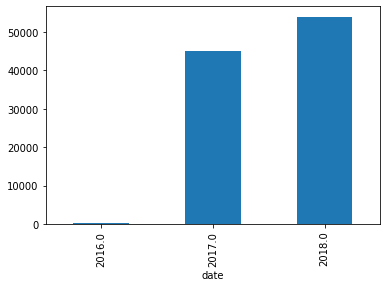

In [ ]:
orders_df["date"] = orders_df["order_approved_at"].astype("datetime64")
orders_df["date"].groupby(orders_df["date"].dt.year).count().plot(kind="bar")

Fica claro que o conjunto de dados se limita a dois anos (2017 e 2018). 

Uma possível forma de analisar esses dados seria levar em conta a variação do frete no tempo, ao se considerar fatores como alteração de valor da moeda, de combustível, logísticos etc. Mas isso resultaria em uma análise temporal, e sem talvez grandes resultados em relação a análise direta dos dados. Também fugiria um pouco a proposta, então optou-se por não trabalhar considerando essa variabilidade e o tempo disponível para tratar os dados.

### **c)** *products_df*

In [ ]:
print(" HEAD: \n{-------------------------")
display(products_df.head())
print("-------------------------}\n")
print(" INFO: \n{-------------------------")
display(products_df.info())
print("-------------------------}\n")
print(" VALORES ÚNICOS: \n{-------------------------")
display(products_df.nunique())
print("-------------------------}")


 HEAD: 
{-------------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


-------------------------}

 INFO: 
{-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

-------------------------}

 VALORES ÚNICOS: 
{-------------------------


product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

-------------------------}


Ao todo, as 3095 lojas agruparam seus produtos em 73 categorias. É válido entender quais são essas categorias para uma possível recategorização futura.

In [ ]:
display(products_df.product_category_name.unique())
print("--------------")

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

--------------


Ao visualizar as categorias foi possível perceber que muitas delas se cruzavam.
Considerou-se ainda que o real fator para a variação no preço de frete seria, não a categoria, mas o tipo de produto - Frágil, Perecível, Eletrônicos, Comum.

Isso pois essas características agregam ao seguro do produto atribuido na nota fiscal, durante a emissão do frete.

Outra possibilidade é a de simplesmente reduzir as categorias a categorias mais unificadas.

#### **Recategorização de Produtos**

Como comentado anteriormente, uma das possíveis estratégias para lidar com os dados é a construção de uma recategorização de produtos. A construção dessa susbstituição é parte do planejamento para o teste de Hipótese III  que lida com impactos das categorias no valor do frete.

Mais detalhes sobre a Hipótese III são tratados na seção da mesma.

In [ ]:
#As categorias originais são 73
#armazenadas em products_df
#Armazenamento de Categorias: Frágil, Comum, Perecivel, Eletronicos
Catg1_products_df = products_df
#Armazenamento de Categorias 2: 14 novas categorias
Catg2_products_df = products_df


fragil = ['perfumaria', 'artes_e_artesanato', 'artes', 'instrumentos_musicais', 'beleza_saude']
comum = ['esporte_lazer', 'bebes', 'utilidades_domesticas', 'cool_stuff', 'moveis_decoracao', 'brinquedos', 'cama_mesa_banho', 'construcao_ferramentas_seguranca', 'malas_acessorios', 'ferramentas_jardim', 'moveis_escritorio', 'automotivo', 'fashion_calcados', 'papelaria', 'fashion_bolsas_e_acessorios', 'casa_construcao', 'relogios_presentes', 'construcao_ferramentas_construcao', 'pet_shop', 'agro_industria_e_comercio', 'moveis_sala', 'sinalizacao_e_seguranca', 'livros_interesse_geral', 'construcao_ferramentas_ferramentas', 'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'industria_comercio_e_negocios', 'construcao_ferramentas_iluminacao', 'livros_tecnicos', 'artigos_de_festas', 'market_place', 'la_cuisine', 'construcao_ferramentas_jardim', 'fashion_roupa_feminina', 'casa_conforto', 'musica', 'livros_importados', 'fashion_esporte', 'artigos_de_natal', 'fashion_roupa_infanto_juvenil', 'dvds_blu_ray', 'moveis_quarto', 'fraldas_higiene', 'casa_conforto_2', 'seguros_e_servicos', 'moveis_colchao_e_estofado', 'cds_dvds_musicais']
perecivel = ['bebidas', 'alimentos', 'alimentos_bebidas', 'flores']
eletronicos = ['eletrodomesticos', 'informatica_acessorios', 'eletronicos', 'telefonia', 'pcs', 'eletroportateis', 'climatizacao', 'consoles_games', 'telefonia_fixa', 'eletrodomesticos_2', 'audio', 'tablets_impressao_imagem', 'portateis_casa_forno_e_cafe', 'pc_gamer', 'cine_foto', 'portateis_cozinha_e_preparadores_de_alimentos']

Catg1_products_df = Catg1_products_df.replace(fragil,"fragil")
Catg1_products_df = Catg1_products_df.replace(comum,"comum")
Catg1_products_df = Catg1_products_df.replace(perecivel,"perecivel")
Catg1_products_df = Catg1_products_df.replace(eletronicos,"eletronicos")

In [ ]:


artes = ['instrumentos_musicais','artes','artes_e_artesanato','musica','dvds_blu_ray','cds_dvds_musicais','cool_stuff']
livros_papelaria = ['livros_tecnicos','livros_importados','papelaria','livros_interesse_geral']
cosmeticos = ['perfumaria','beleza_saude']
casa_e_decoracao = ['moveis_decoracao','artigos_de_natal','cama_mesa_banho','moveis_escritorio','casa_conforto','moveis_colchao_e_estofado','utilidades_domesticas','moveis_sala','moveis_cozinha_area_de_servico_jantar_e_jardim','casa_conforto_2','moveis_colchao_e_estofado','moveis_quarto']
roupas = ['fashion_calcados','fashion_bolsas_e_acessorios','relogios_presentes','fashion_underwear_e_moda_praia','fashion_roupa_masculina','fashion_roupa_feminina','fashion_roupa_infanto_juvenil']
esporte = ['esporte_lazer','fashion_esporte']
ferramentas_e_construcao = ['construcao_ferramentas_seguranca','construcao_ferramentas_iluminacao','construcao_ferramentas_construcao','casa_construcao','construcao_ferramentas_ferramentas','construcao_ferramentas_jardim']
carro_viagens = ['malas_acessorios','automotivo']
agro_industria_e_animais = ['ferramentas_jardim','pet_shop','flores','agro_industria_e_comercio','industria_comercio_e_negocios']
cozinha = ['bebidas','alimentos_bebidas','alimentos','la_cuisine']
infantil = ['bebes','brinquedos','artigos_de_festas','fraldas_higiene']
servico_seguranca = ['seguros_e_servicos','market_place','sinalizacao_e_seguranca','telefonia_fixa']
eletronicos = ['informatica_acessorios','eletronicos','telefonia','pcs','eletroportateis','consoles_games','tablets_impressao_imagem','pc_gamer','cine_foto']
eletricos = ['eletrodomesticos','climatizacao','eletrodomesticos_2','audio','portateis_casa_forno_e_cafe','portateis_cozinha_e_preparadores_de_alimentos']

Catg2_products_df = Catg2_products_df.replace(artes,"artes")
Catg2_products_df = Catg2_products_df.replace(livros_papelaria,"livros_papelaria")
Catg2_products_df = Catg2_products_df.replace(cosmeticos,"cosmeticos")
Catg2_products_df = Catg2_products_df.replace(casa_e_decoracao,"casa_e_decoracao")
Catg2_products_df = Catg2_products_df.replace(roupas,"roupas")
Catg2_products_df = Catg2_products_df.replace(esporte,"esporte")
Catg2_products_df = Catg2_products_df.replace(ferramentas_e_construcao,"ferramentas_e_construcao")
Catg2_products_df = Catg2_products_df.replace(carro_viagens,"carro_viagens")
Catg2_products_df = Catg2_products_df.replace(agro_industria_e_animais,"agro_industria_e_animais")
Catg2_products_df = Catg2_products_df.replace(cozinha,"cozinha")
Catg2_products_df = Catg2_products_df.replace(infantil,"infantil")
Catg2_products_df = Catg2_products_df.replace(servico_seguranca,"servico_seguranca")
Catg2_products_df = Catg2_products_df.replace(eletronicos,"eletronicos")
Catg2_products_df = Catg2_products_df.replace(eletricos,"eletricos")


Vamos confirmar quantos valores únicos os Dataframes criados possuem.

In [ ]:
display(products_df.nunique())
print("--------------")
display(Catg1_products_df.nunique())
print("--------------")
display(Catg2_products_df.nunique())

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

--------------


product_id                    32951
product_category_name             4
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

--------------


product_id                    32951
product_category_name            14
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

Agora vamos visualizar as categorias de produtos únicas de cada Dataframe criado.

In [ ]:
print("--------------")
display(Catg1_products_df.product_category_name.unique())
display(Catg1_products_df['product_category_name'].value_counts())
print("--------------")
display(Catg2_products_df.product_category_name.unique())


--------------


array(['fragil', 'comum', 'eletronicos', nan, 'perecivel'], dtype=object)

comum          23678
eletronicos     4707
fragil          3675
perecivel        281
Name: product_category_name, dtype: int64

--------------


array(['cosmeticos', 'artes', 'esporte', 'infantil', 'casa_e_decoracao',
       'eletricos', 'ferramentas_e_construcao', 'eletronicos',
       'carro_viagens', 'agro_industria_e_animais', 'roupas',
       'livros_papelaria', nan, 'servico_seguranca', 'cozinha'],
      dtype=object)

Total de produtos sem categoria = 32951 - 32341 = 610 (1.8%)

Isso pode afetar a Hipótese III caso muitos produtos vendidos estejam sem categoria. É uma possibilidade tratar isso durante o treino de modelos da Hipótese III para nao afetar as demais hipóteses que não trabalham com categorias.

### **d)** *seller_df*

Esse conjunto de dados representa os dados de código postal, cidade, e estado dos lojistas. Relevante para tentar traçar distância de loja e cliente.

In [ ]:
print(" HEAD: \n{-------------------------")
display(seller_df.head())
print("-------------------------}\n")
print(" INFO: \n{-------------------------")
display(seller_df.info())
print("-------------------------}\n")
print(" VALORES ÚNICOS: \n{-------------------------")
display(seller_df.nunique())
print("-------------------------}")

 HEAD: 
{-------------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


-------------------------}

 INFO: 
{-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

-------------------------}

 VALORES ÚNICOS: 
{-------------------------


seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

-------------------------}


### **e)** *customer_df*

Análogo ao dataframe dos lojistas, esse conjunto de dados representa os dados de código postal, cidade, e estado dos clientes. Relevante para tentar traçar distância de loja e cliente.

In [ ]:
print(" HEAD: \n{-------------------------")
display(customer_df.head())
print("-------------------------}\n")
print(" INFO: \n{-------------------------")
display(customer_df.info())
print("-------------------------}\n")
print(" VALORES ÚNICOS: \n{-------------------------")
display(customer_df.nunique())
print("-------------------------}")

 HEAD: 
{-------------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


-------------------------}

 INFO: 
{-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

-------------------------}

 VALORES ÚNICOS: 
{-------------------------


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

-------------------------}


### **f)** *geo_df*

Esse conjunto de dados representa os dados de latitude e longitude de acordo com os códigos postais. Relevante para cruzar informações com o dataframe de localização dos clientes e dos lojistas, para dessa forma traçar distância de loja e cliente.

In [ ]:
print(" HEAD: \n{-------------------------")
display(geo_df.head())
print("-------------------------}\n")
print(" INFO: \n{-------------------------")
display(geo_df.info())
print("-------------------------}\n")
print(" VALORES ÚNICOS: \n{-------------------------")
display(geo_df.nunique())
print("-------------------------}")

 HEAD: 
{-------------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


-------------------------}

 INFO: 
{-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

-------------------------}

 VALORES ÚNICOS: 
{-------------------------


geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

-------------------------}


#### **Tratamento de Valores Repetidos**

Os prefixos dos códigos zip apresentam valores repetidos, dessa forma vamos eliminar valores duplicados para evitar problemas no cruzamento de dados entre os Dataframes

In [ ]:
geo_df = geo_df.sort_values('geolocation_zip_code_prefix', ascending=False)
geo_df = geo_df.drop_duplicates(subset="geolocation_zip_code_prefix", keep='first')
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19015 entries, 999758 to 1351
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


## Construção de Variáveis e Dataframe Final

### **Construção de Dados:** *time_df*

As datas que estão no dataframe **orders_df** estão no formato *object*, então é necessário convertelas para o formato *datetime* para que possamos trabalhar com as mesmas.\
Também é criado outro dataframe, com o nome **time_df**, para armazenar apenas as informações de datas consideradas necessárias.

In [ ]:
time_df = orders_df[['order_id', 'order_approved_at', 'order_estimated_delivery_date']]
time_df[['order_approved_at', 'order_estimated_delivery_date']] = orders_df[['order_approved_at', 'order_estimated_delivery_date']].astype('datetime64[ns]')
time_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   order_approved_at              99281 non-null  datetime64[ns]
 2   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Através da data de aprovação do pedido e da data estimada de entrega, é calculado o tempo estimado de entrega, que depois é convertido para o formato de horas.

In [ ]:
time_df['tempo'] = time_df['order_estimated_delivery_date'] - time_df['order_approved_at']
time_df['tempo_horas'] = time_df['tempo'].dt.total_seconds() / ( 60 * 60)
time_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,order_approved_at,order_estimated_delivery_date,tempo,tempo_horas
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10-18,15 days 12:52:45,372.879167
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-08-13,17 days 20:35:33,428.592500
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-09-04,26 days 15:04:37,639.076944
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-12-15,26 days 04:14:01,628.233611
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02-26,12 days 01:39:31,289.658611


In [ ]:
display(time_df.info())
display(time_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   order_approved_at              99281 non-null  datetime64[ns] 
 2   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 3   tempo                          99281 non-null  timedelta64[ns]
 4   tempo_horas                    99281 non-null  float64        
dtypes: datetime64[ns](2), float64(1), object(1), timedelta64[ns](1)
memory usage: 3.8+ MB


None

order_id                         99441
order_approved_at                90733
order_estimated_delivery_date      459
tempo                            92338
tempo_horas                      92338
dtype: int64

### **Cruzamento dos Dataframes :** *final_df*

Primeiro vamos fundir o olist_order_items_dataset que apresenta o id do vendedor, com o olist_orders_dataset que tem os dados de id do comprador. Isso pode ser feito através da variável *order_id*.

In [ ]:
order_items_df = order_items_df.drop(['order_item_id', 'shipping_limit_date'], axis=1)
#final_df = pd.merge(order_items_df, orders_df, left_on='order_id', right_on='order_id', how='left').drop(['order_status',	'order_purchase_timestamp',	'order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date'], axis=1)
final_df = pd.merge(order_items_df, orders_df, on=['order_id','order_id']).drop(['order_status',	'order_purchase_timestamp',	'order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date'], axis=1)

In [ ]:
print("----------Informações----------------")
display(order_items_df.info())
print("----------Média de Preços----------------")
display(order_items_df[['price']].mean())

----------Informações----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101473 entries, 112649 to 0
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       101473 non-null  object 
 1   product_id     101473 non-null  object 
 2   seller_id      101473 non-null  object 
 3   price          101473 non-null  float64
 4   freight_value  101473 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


None

----------Média de Preços----------------


price    124.845247
dtype: float64

In [ ]:
print("----------Revisão do Head----------------")
display(final_df.head())
print("----------Revisão da Info----------------")
display(final_df.info())

----------Revisão do Head----------------


,order_id,product_id,seller_id,price,freight_value,customer_id,date
0,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,2018-06-09 17:10:13
1,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-15 00:04:32
2,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-24 17:14:25
3,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-17 04:31:48
4,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-25 04:11:01


----------Revisão da Info----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101473 entries, 0 to 101472
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_id       101473 non-null  object        
 1   product_id     101473 non-null  object        
 2   seller_id      101473 non-null  object        
 3   price          101473 non-null  float64       
 4   freight_value  101473 non-null  float64       
 5   customer_id    101473 non-null  object        
 6   date           101459 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.2+ MB


None

### **Combinando os dados de clientes e lojistas ao *final_df***

O próximo passo vai ser construir Dataframes com os dados de localização dos clientes e vendedores. Os datasets **olist_sellers_dataset** e **olist_customers_dataset** tem os dados de prefixo do código zip, que podem ser correlacionados com o dataset **olist_geolocation_dataset** que possui informações de latitude e longitude para cada prefixo zip.

In [ ]:
seller_df = seller_df.drop(['seller_city',	'seller_state'], axis = 1)
seller_df = seller_df.rename(columns={'seller_zip_code_prefix': 'geolocation_zip_code_prefix'})
#seller_df = pd.merge(seller_df, geo_df, left_on='geolocation_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(['geolocation_city',	'geolocation_state',	'geolocation_zip_code_prefix'],axis = 1)
seller_df = pd.merge(seller_df, geo_df, on='geolocation_zip_code_prefix', how='left').drop(['geolocation_city',	'geolocation_state',	'geolocation_zip_code_prefix'],axis = 1)

In [ ]:
print("------seller_df----After Drop Head----------------")
display(seller_df.head())
print("----------After Drop Info----------------")
display(seller_df.info())

------seller_df----After Drop Head----------------


,seller_id,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,-22.891515,-47.060648
1,d1b65fc7debc3361ea86b5f14c68d2e2,-22.379373,-46.946155
2,ce3ad9de960102d0677a81f5d0bb7b2d,-22.911954,-43.176445
3,c0f3eea2e14555b6faeea3dd58c1b1c3,-23.655269,-46.612199
4,51a04a8a6bdcb23deccc82b0b80742cf,-22.960967,-46.538254


----------After Drop Info----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seller_id        3095 non-null   object 
 1   geolocation_lat  3088 non-null   float64
 2   geolocation_lng  3088 non-null   float64
dtypes: float64(2), object(1)
memory usage: 96.7+ KB


None

In [ ]:
customer_df = customer_df.drop(['customer_city',	'customer_state', 'customer_unique_id'	], axis = 1)
customer_df = customer_df.rename(columns={'customer_zip_code_prefix': 'geolocation_zip_code_prefix'})
customer_df = pd.merge(customer_df, geo_df, left_on='geolocation_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(['geolocation_city',	'geolocation_state',	'geolocation_zip_code_prefix'],axis = 1)

In [ ]:
print("--------customer_df--After Drop Head----------------")
display(customer_df.head())
print("----------After Drop Info----------------")
display(customer_df.info())

--------customer_df--After Drop Head----------------


,customer_id,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,-20.493157,-47.403578
1,18955e83d337fd6b2def6b18a428ac77,-23.724495,-46.548297
2,4e7b3e00288586ebd08712fdd0374a03,-23.533334,-46.654074
3,b2b6027bc5c5109e529d4dc6358b12c3,-23.498500,-46.182988
4,4f2d8ab171c80ec8364f7c12e35b23ad,-22.989565,-47.154283


----------After Drop Info----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      99441 non-null  object 
 1   geolocation_lat  99163 non-null  float64
 2   geolocation_lng  99163 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.0+ MB


None

Agora os Dataframes com as informações de localização dos vendedores e clientes podem ser fundidos com o Dataframe principal (**final_df**), através de seus respectivos id's, *seller_id* e *customer_id*.

In [ ]:
final_df = pd.merge(final_df, seller_df, left_on='seller_id', right_on='seller_id', how='left')
final_df = final_df.rename(columns={'geolocation_lat': 'seller_geolocation_lat', 'geolocation_lng' : 'seller_geolocation_lng'})

In [ ]:
print("------Verificação após merge de seller_df---------")
final_df.head()

------Verificação após merge de seller_df---------


,order_id,product_id,seller_id,price,freight_value,customer_id,date,seller_geolocation_lat,seller_geolocation_lng
0,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,2018-06-09 17:10:13,-21.755645,-48.838137
1,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-15 00:04:32,-23.636657,-46.694780
2,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-24 17:14:25,-25.472306,-49.289249
3,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-17 04:31:48,-23.532923,-46.645009
4,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-25 04:11:01,-26.912190,-48.676262


Em seguida é feito o merge() ao final_df, com o customer_df

In [ ]:
final_df = pd.merge(final_df, customer_df, left_on='customer_id', right_on='customer_id', how='left')
final_df = final_df.rename(columns={'geolocation_lat': 'customer_geolocation_lat', 'geolocation_lng' : 'customer_geolocation_lng'})

In [ ]:
print("------Verificação head() após merge de customer_df---------")
display(final_df.head())
print("------Verificação do info após merge de customer_df---------")
display(final_df.info())

------Verificação head() após merge de customer_df---------


,order_id,product_id,seller_id,price,freight_value,customer_id,date,seller_geolocation_lat,seller_geolocation_lng,customer_geolocation_lat,customer_geolocation_lng
0,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,2018-06-09 17:10:13,-21.755645,-48.838137,-22.913788,-48.439351
1,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-15 00:04:32,-23.636657,-46.694780,-23.043228,-46.974838
2,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-24 17:14:25,-25.472306,-49.289249,-23.597378,-46.654431
3,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-17 04:31:48,-23.532923,-46.645009,-25.584272,-49.314016
4,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-25 04:11:01,-26.912190,-48.676262,-2.493458,-44.294936


------Verificação do info após merge de customer_df---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101473 entries, 0 to 101472
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  101473 non-null  object        
 1   product_id                101473 non-null  object        
 2   seller_id                 101473 non-null  object        
 3   price                     101473 non-null  float64       
 4   freight_value             101473 non-null  float64       
 5   customer_id               101473 non-null  object        
 6   date                      101459 non-null  datetime64[ns]
 7   seller_geolocation_lat    101249 non-null  float64       
 8   seller_geolocation_lng    101249 non-null  float64       
 9   customer_geolocation_lat  101192 non-null  float64       
 10  customer_geolocation_lng  101192 non-null  float64       
dtypes: d

None

### **Criação de variável**: *product_volume_cm3*
No Dataframe com as informações dos produtos (**products_df**), a partir dos dados de altura, comprimento e largura, é possível criar uma nova coluna, com o volume do produto. Também é criada uma coluna para o peso dimensional, embora essa não tenha sido utilizada.

\begin{align}
        Volume = Largura \cdot Altura \cdot Comprimento
    \end{align}

In [ ]:
products_df["product_volume_cm3"] = products_df["product_length_cm"] * products_df["product_height_cm"] * products_df["product_width_cm"] 
products_df["dimensional_weight"] = products_df["product_volume_cm3"] / 6000
display(products_df.head()) 
#Criando para os dataframes com categorias diferentes:
#Categoria 1
Catg1_products_df["product_volume_cm3"] = Catg1_products_df["product_length_cm"] * Catg1_products_df["product_height_cm"] * Catg1_products_df["product_width_cm"] 
Catg1_products_df["dimensional_weight"] = Catg1_products_df["product_volume_cm3"] / 6000
display(Catg1_products_df.head()) 
#Categoria 2
Catg2_products_df["product_volume_cm3"] = Catg2_products_df["product_length_cm"] * Catg2_products_df["product_height_cm"] * Catg2_products_df["product_width_cm"] 
Catg2_products_df["dimensional_weight"] = Catg2_products_df["product_volume_cm3"] / 6000
display(Catg2_products_df.head()) 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,dimensional_weight
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.373333
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,1.800000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.405000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,0.450667
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.736667


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,dimensional_weight
0,1e9e8ef04dbcff4541ed26657ea517e5,fragil,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.373333
1,3aa071139cb16b67ca9e5dea641aaa2f,fragil,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,1.800000
2,96bd76ec8810374ed1b65e291975717f,comum,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.405000
3,cef67bcfe19066a932b7673e239eb23d,comum,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,0.450667
4,9dc1a7de274444849c219cff195d0b71,comum,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.736667


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,dimensional_weight
0,1e9e8ef04dbcff4541ed26657ea517e5,cosmeticos,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.373333
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,1.800000
2,96bd76ec8810374ed1b65e291975717f,esporte,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.405000
3,cef67bcfe19066a932b7673e239eb23d,infantil,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,0.450667
4,9dc1a7de274444849c219cff195d0b71,casa_e_decoracao,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.736667


Fundindo o Dataframe com informações de tempo para entrega com o Dataframe principal, através da variável *orders_id*.

In [ ]:
final_df = pd.merge(final_df, time_df, left_on='order_id', right_on='order_id', how='left').drop(['order_approved_at',	'order_estimated_delivery_date',	'tempo'], axis=1)
final_df.head()

,order_id,product_id,seller_id,price,freight_value,customer_id,date,seller_geolocation_lat,seller_geolocation_lng,customer_geolocation_lat,customer_geolocation_lng,tempo_horas
0,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,2018-06-09 17:10:13,-21.755645,-48.838137,-22.913788,-48.439351,438.829722
1,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-15 00:04:32,-23.636657,-46.694780,-23.043228,-46.974838,239.924444
2,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-24 17:14:25,-25.472306,-49.289249,-23.597378,-46.654431,390.759722
3,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-17 04:31:48,-23.532923,-46.645009,-25.584272,-49.314016,355.470000
4,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-25 04:11:01,-26.912190,-48.676262,-2.493458,-44.294936,547.816389


### **Criação de dataframes auxiliares:** *catg1_final_df , catg2_final_df*

Já realizados os tratamentos de criação de variaveis no *product_df*, resta assimilar, através da variável *product_id*, ele ao *final_df*. Assim *final_df* passará a conter os dados que possuem maior potencial de influenciar no preço do frete, de acordo com a imersão realizada nos dados.

Aqui também são criados os dataframes auxiliares: *catg1_final_df()*, *catg2_final_df()*, como cópias do *final_df* antes do merge. Dessa forma cada um assume o merge respectivo com os df: *catg1_products_df* e *catg2_products_df*


In [ ]:
#Criando DF com as colunas de categoria mais simplificadas (4 categorias)
Catg1_final_df = final_df
Catg1_final_df = pd.merge(Catg1_final_df, Catg1_products_df, left_on='product_id', right_on='product_id', how='left').drop(['product_description_lenght', 'product_name_lenght', 'product_photos_qty'], axis=1)
print("-----Merge de Categorias 1 ----------------")
#display(Catg1_final_df.head())
#Criando DF com as colunas de categoria novas (14 categorias)
Catg2_final_df = final_df
Catg2_final_df = pd.merge(Catg2_final_df, Catg2_products_df, left_on='product_id', right_on='product_id', how='left').drop(['product_description_lenght', 'product_name_lenght', 'product_photos_qty'], axis=1)
print("-----Merge de Categorias 2 ----------------")
#display(Catg2_final_df.head())
#Criando DF com as colunas de categoria originais (73 categorias)
final_df = pd.merge(final_df, products_df, left_on='product_id', right_on='product_id', how='left').drop(['product_description_lenght', 'product_name_lenght', 'product_photos_qty'], axis=1)
print("-----Merge de Categoria Original----------------")
#display(final_df.head())



-----Merge de Categorias 1 ----------------
-----Merge de Categorias 2 ----------------
-----Merge de Categoria Original----------------


In [ ]:
print("--------Checando head() após merge com products_df--------")
display(final_df.info())
print("--------Checando describe() após merge com products_df--------")
display(final_df.describe())

--------Checando head() após merge com products_df--------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101473 entries, 0 to 101472
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  101473 non-null  object        
 1   product_id                101473 non-null  object        
 2   seller_id                 101473 non-null  object        
 3   price                     101473 non-null  float64       
 4   freight_value             101473 non-null  float64       
 5   customer_id               101473 non-null  object        
 6   date                      101459 non-null  datetime64[ns]
 7   seller_geolocation_lat    101249 non-null  float64       
 8   seller_geolocation_lng    101249 non-null  float64       
 9   customer_geolocation_lat  101192 non-null  float64       
 10  customer_geolocation_lng  101192 non-null  float64       
 11  tempo_

None

--------Checando describe() após merge com products_df--------


,price,freight_value,seller_geolocation_lat,seller_geolocation_lng,customer_geolocation_lat,customer_geolocation_lng,tempo_horas,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,dimensional_weight
count,101473.000000,101473.000000,101249.000000,101249.000000,101192.000000,101192.000000,101459.000000,101457.000000,101457.000000,101457.000000,101457.000000,101457.000000,101457.000000
mean,124.845247,20.285455,-22.794471,-47.227479,-21.192402,-46.178357,560.742852,2097.985501,30.116650,16.441941,23.062766,15208.545965,2.534758
std,189.637305,15.855575,2.738219,2.349384,5.616553,4.060366,212.423776,3759.537789,16.110907,13.343163,11.758252,23439.216765,3.906536
min,0.850000,4.510000,-32.095725,-67.804146,-33.687674,-72.678886,-159.941389,0.000000,7.000000,2.000000,6.000000,168.000000,0.028000
25%,40.000000,13.370000,-23.613259,-48.838137,-23.589247,-48.094018,431.493750,300.000000,18.000000,8.000000,15.000000,2816.000000,0.469333
50%,78.990000,16.400000,-23.418030,-46.753466,-22.925054,-46.630277,546.161944,700.000000,25.000000,13.000000,20.000000,6400.000000,1.066667
75%,139.220000,21.310000,-21.755645,-46.519821,-20.154170,-43.607959,674.516667,1800.000000,38.000000,20.000000,30.000000,18375.000000,3.062500
max,6735.000000,409.680000,-2.503382,-34.851080,42.184003,-4.947823,3685.824722,40425.000000,105.000000,105.000000,118.000000,296208.000000,49.368000


### **Criação de variável**: *distancia*

Informações de latitude e longitude não podem ser usadas de forma direta. Devemos utilizar essa informação para calcular a distância entre os dois pontos (vendedor e comprador), que vai ser mais útil para a criação de um modelo. \

A distância pode ser calculada através da função *geopy.distance.geodesic*. Vamos calcular a distância em quilomêtros.

In [ ]:
#Para criar a variável distância é necessário tratar os dados faltantes
final_df.dropna(inplace=True)
Catg1_final_df.dropna(inplace=True)
Catg2_final_df.dropna(inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99511 entries, 0 to 101472
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99511 non-null  object        
 1   product_id                99511 non-null  object        
 2   seller_id                 99511 non-null  object        
 3   price                     99511 non-null  float64       
 4   freight_value             99511 non-null  float64       
 5   customer_id               99511 non-null  object        
 6   date                      99511 non-null  datetime64[ns]
 7   seller_geolocation_lat    99511 non-null  float64       
 8   seller_geolocation_lng    99511 non-null  float64       
 9   customer_geolocation_lat  99511 non-null  float64       
 10  customer_geolocation_lng  99511 non-null  float64       
 11  tempo_horas               99511 non-null  float64       
 12  product_category_

In [ ]:
def calc_dist(cust,sel):
    return distance.geodesic(cust,sel).km
    
final_df['distance'] = final_df[[
    'customer_geolocation_lat',
    'customer_geolocation_lng',
    'seller_geolocation_lat',
    'seller_geolocation_lng'
]].apply(lambda row: calc_dist((row.customer_geolocation_lat,row.customer_geolocation_lng),(row.seller_geolocation_lat,row.seller_geolocation_lng)), axis=1)

final_df.drop(['customer_geolocation_lat',
    'customer_geolocation_lng',
    'seller_geolocation_lat',
    'seller_geolocation_lng'], axis = 1 ,inplace = True)

final_df.head(5)

,order_id,product_id,seller_id,price,freight_value,customer_id,date,tempo_horas,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,dimensional_weight,distance
0,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,2018-06-09 17:10:13,438.829722,cama_mesa_banho,600.0,30.0,3.0,19.0,1710.0,0.285000,134.665951
1,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,2017-08-15 00:04:32,239.924444,informatica_acessorios,100.0,20.0,20.0,20.0,8000.0,1.333333,71.690647
2,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,2017-10-24 17:14:25,390.759722,esporte_lazer,967.0,21.0,24.0,19.0,9576.0,1.596000,338.223211
3,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,2018-07-17 04:31:48,355.470000,informatica_acessorios,8950.0,45.0,26.0,38.0,44460.0,7.410000,353.165139
4,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-25 04:11:01,547.816389,utilidades_domesticas,10150.0,89.0,15.0,40.0,53400.0,8.900000,2742.331873


In [ ]:
Catg1_final_df['distance'] = final_df['distance']
Catg2_final_df['distance'] = final_df['distance']

### **Remoção de dados faltantes:**  *'nan'* dentro do *final_df*
Existem algumas colunas com certo número de dados faltantes, como a base dados é grande, não foi considerado um empecilho eliminar estas linhas. 

In [ ]:
#Mais uma vez tratamos os dados faltantes, agora já com todas as colunas para o
# dataframe final presentes.
final_df.dropna(inplace=True)
Catg1_final_df.dropna(inplace=True)
Catg2_final_df.dropna(inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99511 entries, 0 to 101472
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               99511 non-null  object        
 1   product_id             99511 non-null  object        
 2   seller_id              99511 non-null  object        
 3   price                  99511 non-null  float64       
 4   freight_value          99511 non-null  float64       
 5   customer_id            99511 non-null  object        
 6   date                   99511 non-null  datetime64[ns]
 7   tempo_horas            99511 non-null  float64       
 8   product_category_name  99511 non-null  object        
 9   product_weight_g       99511 non-null  float64       
 10  product_length_cm      99511 non-null  float64       
 11  product_height_cm      99511 non-null  float64       
 12  product_width_cm       99511 non-null  float64       
 13  

99281 

## **Enconding de Categorias:** *Tratamento para Hipótese III*

Vamos tentar transformar a variável categórica *product_category_name* em uma variável numérica utilizando a função **get_dummies**, para depois analisar sua correlação com o valor do frete, e treinar alguns modelos.

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(final_df[["product_category_name"]])

original = final_df
mask = final_df.isnull()

final_df[["product_category_name"]] = final_df[["product_category_name"]].astype(str).apply(LabelEncoder().fit_transform)
final_df[["product_category_name"]].where(~mask, original)
final_df.head()'''

Catg1_final_df = pd.get_dummies(Catg1_final_df, columns = ['product_category_name'])
Catg2_final_df = pd.get_dummies(Catg2_final_df, columns = ['product_category_name'])


Reordenação de colunas.

In [ ]:
#cols = list(final_df.columns.values)
#cols

In [ ]:

final_df = final_df[['order_id',
 'product_id',
 'seller_id',
 'freight_value',
 'product_weight_g',
 'product_volume_cm3',
 'dimensional_weight',
 'price',
 'distance',
 'customer_id',
 'date',
 'product_category_name',
 'product_height_cm',
 'product_width_cm',
 'product_length_cm',
 'tempo_horas']]
 

## Dicionário de Dados do Dataframe principal

**order_id** - identificador único do pedido \
**product_id** - identificador único do produto \
**seller_id** - identificador único do vendedor \
**price** - preço do produto (RS)\
**freight_value** - valor de frete (RS)\
**customer_id** - identificador único do cliente\
**date** - data de emissão do pedido \
**tempo_horas** - tempo estimado de entrega em horas\
**product_category_name** - categoria do produto\
**product_weight_g** - peso do produto (g)\
**product_length_cm** - comprimento do produto/embalagem (cm) \
**product_height_cm** - altura do produto/embalagem (cm)\
**product_width_cm** - largura do produto/embalagem (cm)\
**product_volume_cm3** - volume do produto/embalagem (cm)\
**dimensional_weight** - peso dimensional \
**distance** - distância da entrega (km) \

## **Heatmap**
Vamos analisar como estas variáveis se correlacionam entre si através de um heatmap.

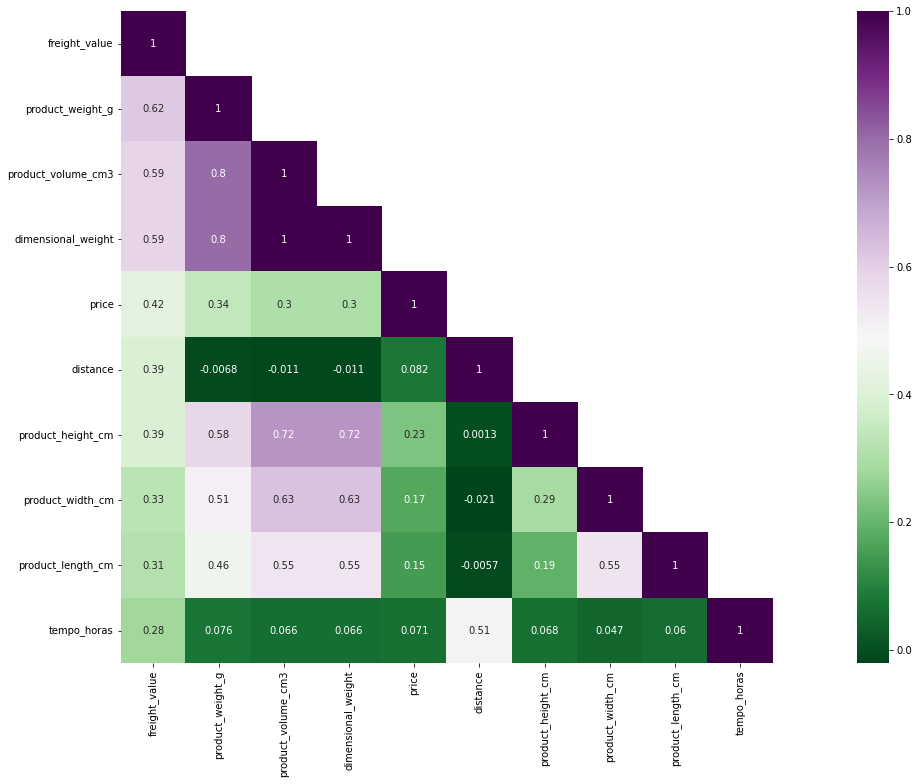

In [ ]:
cor_mapa= final_df[:].corr()
mascara = np.array(cor_mapa)
mascara[np.tril_indices_from(mascara)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mapa,mask=mascara,square=True,annot=True,cbar=True, cmap='PRGn_r')
sns.set(font_scale=1)

As variáveis que possuem maior correlação com o preço do frete são: preço do produto, peso do produto, informações de dimensão do produto e distância da entrega.

## **Análises Gráficas:** *Distribuição e Disperção*

Findada a construção de nosso dataframe *final_df*, partimos para uma análise dos dados dentro das categorias restantes. 

Para as análises de distribuição, optamos por operar utilizando um método de definição de bins, sendo que o mais efetivo em nossos testes foi a regra de referência normal de Scott, que minimiza o erro quadrático médio integrado da estimativa de densidade. 

Já para as análises de dispersão 

### Distribuição de valor dos fretes

Vamos analisar a distribuição do valor dos fretes.

338


Text(0.5, 1.0, 'Distribuição do Valor do Frete')

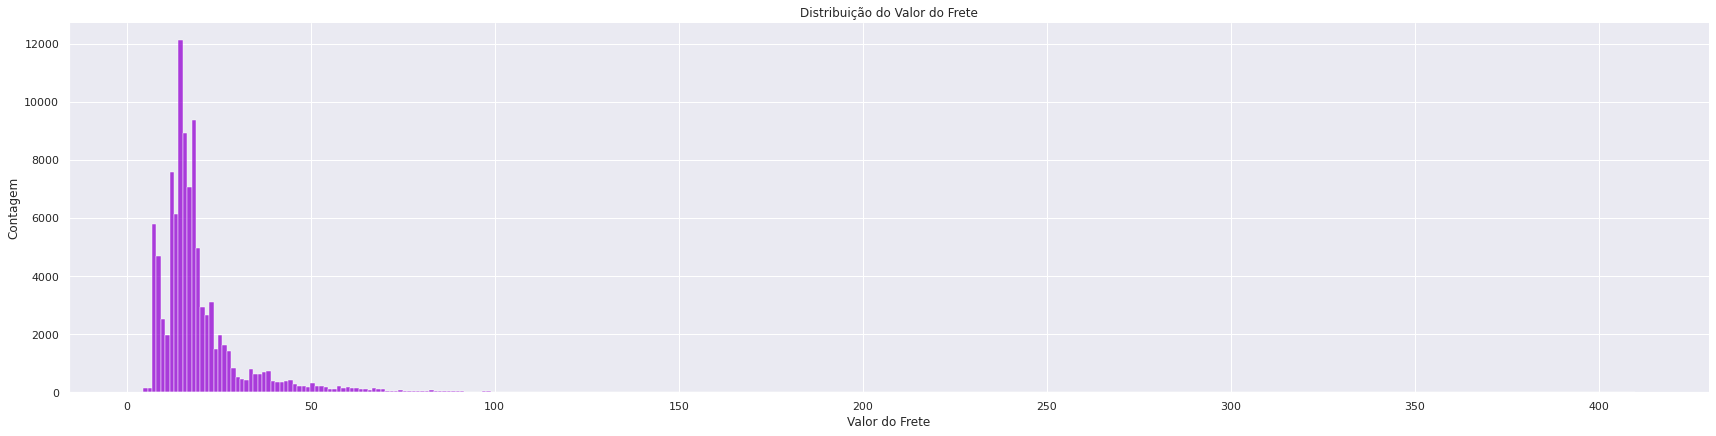

In [ ]:
#Scott's Rule
dist = final_df['freight_value']
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M - m)/h)
print(nclass)

g = sns.displot(final_df.freight_value,kde=False, bins = 'scott',color='darkviolet', height=6,aspect=4 )
g.set_axis_labels("Valor do Frete", "Contagem")
g.set_titles("Distribuição do Valor do Frete")
plt.title('Distribuição do Valor do Frete')

Analisando visualmente o gráfico, nota-se que mais da metade da quantidade de valores se encontra no intervalo de 9 a 24 reais. 

### Distribuição de Peso

143


Text(0.5, 1.0, 'Distribuição do peso de produtos')

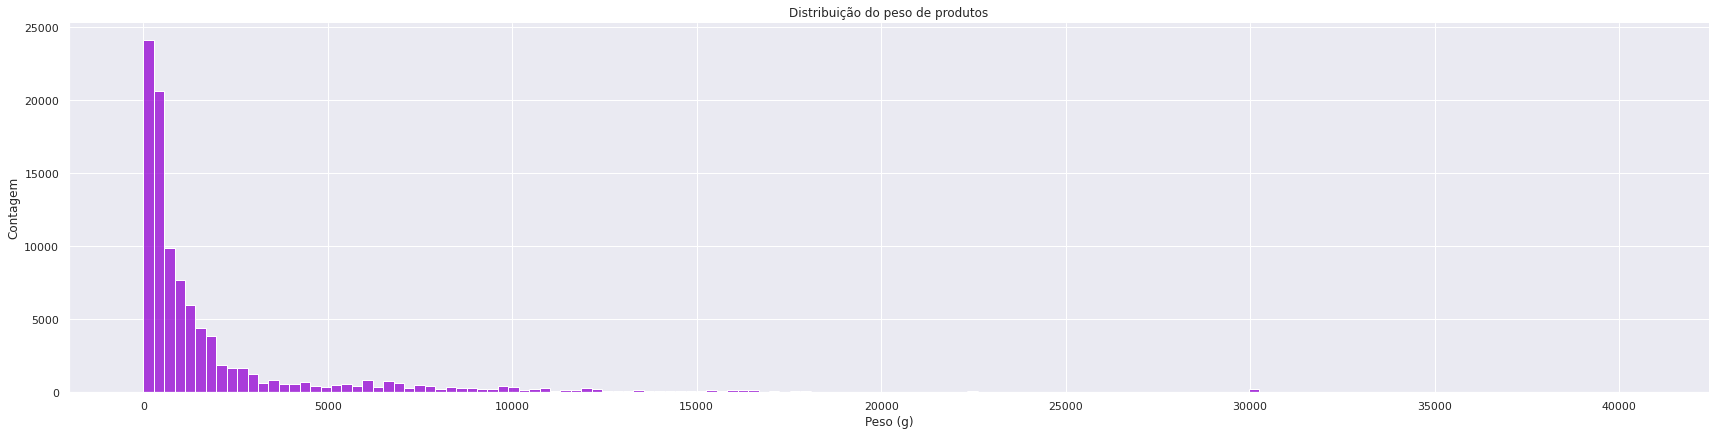

In [ ]:
#Scott's Rule
dist = final_df['product_weight_g']
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M - m)/h)
print(nclass)

g = sns.displot(final_df.product_weight_g,kde=False, bins = 'scott',color='darkviolet', height=6,aspect=4)
g.set_axis_labels("Peso (g)", "Contagem")
g.set_titles("Distribuição do peso de produtos")
plt.title('Distribuição do peso de produtos')

A distribuição possui uma longa cauda devido a alguns poucos produtos em uma faixa de peso maior, porém mais da metade dos produtos está em uma faixa de peso menor do que 1 kg (1000 g).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


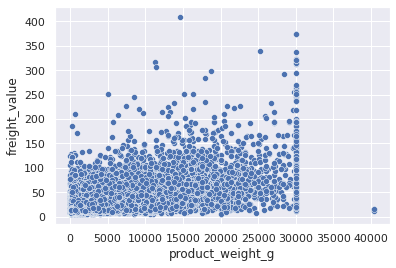

In [ ]:
sns.scatterplot(final_df['product_weight_g'], final_df['freight_value'])

Em acordo com o que foi estudado durante o processo de imersão ao tema, o gráfico de peso apresenta um limite bem destacado. Isso se reflete no fato dos Correios terem limite no presente momento (2022) de até 30kg para encomendas entre estados, e até 50kg para encomendas dentro do mesmo estado. 

O que resulta nessa faixa de preços diversos em torno do limite de carga.
Uma coisa que ficou clara observando os dados mais a fundo é que muitas empresas venderam produtos diversos em caixas grandes, e com o peso máximo. O que caracteriza que as flutuações nos valores de frete ficam por conta de distância e valor da nota fiscal do produto nesses casos.

In [ ]:
# Gráfico de Scatterplot com linha de tendência da variável
# sns.regplot(final_df['product_weight_g'], final_df['freight_value'],ci = 50,scatter_kws={"color": "blue"}, line_kws={"color": "red", 'linewidth':2})

Analisando a dispersão dos dados de peso, percebemos uma "coluna" de dados na faixa de peso de 30kg (30000g) com poucos vaalores após esta faixa. Os Correios por exemplo operam com um limite de peso máximo de 30kg, o que poderia explicar esse comportamento nos dados.

### Distribuição de valores para a variável de volume

167


Text(0.5, 1.0, 'Distribuição do volume')

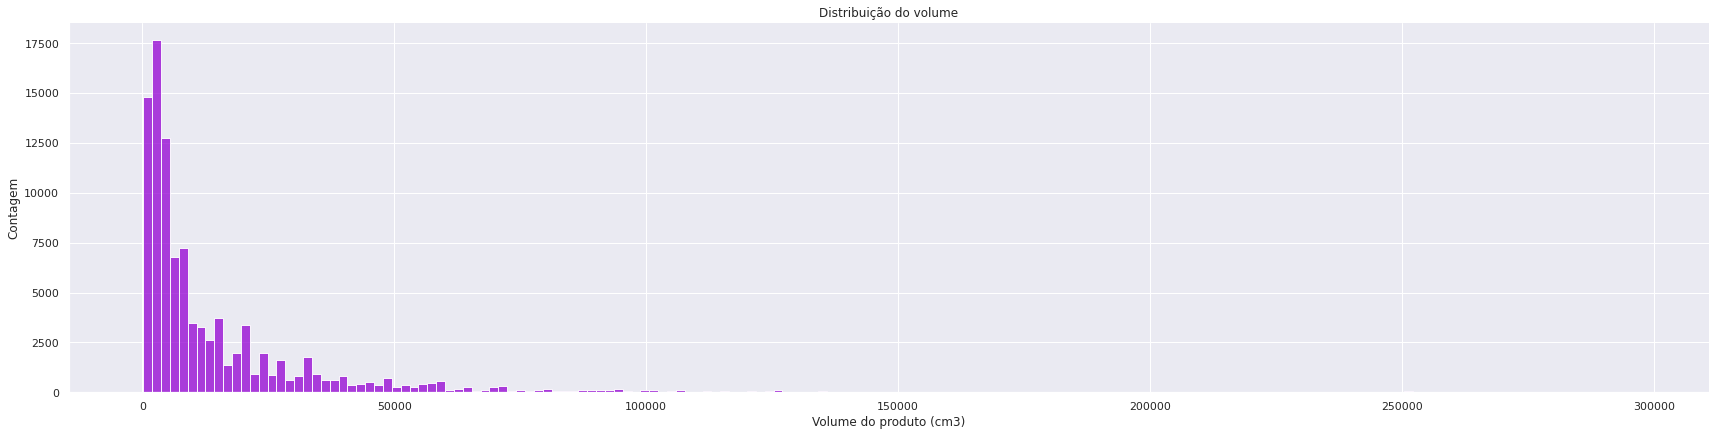

In [ ]:
#Scott's Rule
dist = final_df['product_volume_cm3']
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M - m)/h)
print(nclass)

g = sns.displot(final_df.product_volume_cm3,kde=False, bins = 'scott',color='darkviolet', height=6,aspect=4 )
g.set_axis_labels("Volume do produto (cm3)", "Contagem")
g.set_titles("Distribuição do peso de produtos")
plt.title('Distribuição do volume')

Assim como a distribuição de peso, a distribuição de volume também possui uma cauda longa. Cerca de metade dos fretes tem até 6L (6000 cm³)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


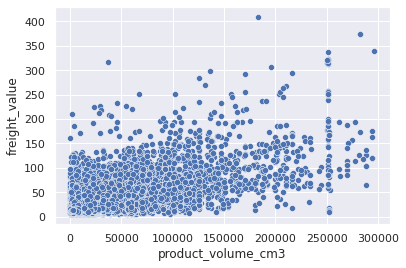

In [ ]:
sns.scatterplot(final_df['product_volume_cm3'], final_df['freight_value'])

**Análise**

Uma coisa que ficou clara observando a dispersão do peso, e agora do volume, é que existe uma faixa limite de ambos para alguns modais de frete. Quando se fala em Correios por exemplo, o volume máximo esperado seria de

 (66.6³) = 295000 cm³ 

Lembrando que esse é um valor hipotético, na prática os correios permitem embalagens com até 105cm de largura, 105cm de comprimento e 105cm de altura, sendo que a soma das três características não pode ultrapassar 200cm (L+C+A = 200), e por isso o volume máximo teórico seria de 66³.
 
Em um primeiro momento decidimos ver mais a fundo o que são esses dados, e produtos, como veremos a seguir: 

In [ ]:
cut_df = final_df[final_df['product_volume_cm3']<251640]
cut_df = cut_df[cut_df['product_volume_cm3']>251600]

display(cut_df.info())
display(cut_df.head())
display(cut_df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 745 to 96925
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               41 non-null     object        
 1   product_id             41 non-null     object        
 2   seller_id              41 non-null     object        
 3   freight_value          41 non-null     float64       
 4   product_weight_g       41 non-null     float64       
 5   product_volume_cm3     41 non-null     float64       
 6   dimensional_weight     41 non-null     float64       
 7   price                  41 non-null     float64       
 8   distance               41 non-null     float64       
 9   customer_id            41 non-null     object        
 10  date                   41 non-null     datetime64[ns]
 11  product_category_name  41 non-null     object        
 12  product_height_cm      41 non-null     float64       
 13  pr

None

,order_id,product_id,seller_id,freight_value,product_weight_g,product_volume_cm3,dimensional_weight,price,distance,customer_id,date,product_category_name,product_height_cm,product_width_cm,product_length_cm,tempo_horas
745,fe12e676fd493885d417a34bc3917411,1d16c0509e7011656e03c6a582ff6667,17f51e7198701186712e53a39c564617,312.41,30000.0,251625.0,41.9375,760.0,2277.896211,8600e7ab4bb1f46a5e24854bcc988b9c,2017-05-22 18:35:15,beleza_saude,75.0,61.0,55.0,1037.412500
1293,fcbb6af360b31b05460c2c8e524588c0,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,144.38,30000.0,251625.0,41.9375,1050.0,330.351992,515a833ce56a4c3153f102787c272e4e,2017-12-01 14:57:29,beleza_saude,75.0,61.0,55.0,825.041944
4812,f3d113574c163b8642fb44302c8fe0c9,9fa7e05ae5cddeb74ff2fe5046b742db,17f51e7198701186712e53a39c564617,100.68,30000.0,251625.0,41.9375,990.0,116.068044,7ca7b6bb5ab0b1ac2529e5c489cf3592,2017-06-27 04:03:14,beleza_saude,75.0,61.0,55.0,643.946111
6022,f0c00b0c02ed4f14f20fad7c26002b9c,338925450cde31710e3fd65b8bac0b1f,17f51e7198701186712e53a39c564617,108.15,29050.0,251625.0,41.9375,760.0,14.232025,67ada02dc1c10400e1bd19e1d84541ff,2018-03-06 09:49:38,beleza_saude,75.0,61.0,55.0,494.172778
7729,ec65d7b245ccca0fccce3759b3642d3e,bad9cd5ad615c0b5ba87448e03ec954c,17f51e7198701186712e53a39c564617,186.45,30000.0,251625.0,41.9375,890.0,2357.928998,81fb8e4ce78197361d444035a8d369c8,2017-05-31 06:55:39,beleza_saude,75.0,61.0,55.0,1025.072500


,order_id,product_id,seller_id,freight_value,product_weight_g,product_volume_cm3,dimensional_weight,price,distance,customer_id,date,product_category_name,product_height_cm,product_width_cm,product_length_cm,tempo_horas
95440,0f238eebf8511e286a8c3fb6330ece54,1d16c0509e7011656e03c6a582ff6667,17f51e7198701186712e53a39c564617,85.81,30000.0,251625.0,41.9375,760.0,64.678441,950dec801b6408c5679e84c382863481,2017-05-22 17:55:19,beleza_saude,75.0,61.0,55.0,510.078056
95470,0f121110b75ef7c38c79d67833c49830,338925450cde31710e3fd65b8bac0b1f,17f51e7198701186712e53a39c564617,196.86,29050.0,251625.0,41.9375,760.0,1320.829990,d506a6e68d7d209947cc3fb558a3a09c,2017-09-14 10:25:47,beleza_saude,75.0,61.0,55.0,925.570278
95815,0e4672661531addf3fa0f55961e55242,dc861f18267cce21f3b70f9f7990b8ce,17f51e7198701186712e53a39c564617,314.02,30000.0,251625.0,41.9375,990.0,2080.505706,9753c2c195f620cc509d22e390197c02,2017-06-27 04:03:18,beleza_saude,75.0,61.0,55.0,1003.945000
96185,0d4381c5179436609adcf581b55639e5,d15010eecc80e3a843ccb15865c328da,17f51e7198701186712e53a39c564617,85.81,30000.0,251625.0,41.9375,760.0,93.371571,99d058afb52d7ad1474103d28382bc83,2017-10-07 16:04:58,beleza_saude,75.0,61.0,55.0,703.917222
96925,0b6230647ed16f4b3e70282dc4b5b87f,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,321.88,30000.0,251625.0,41.9375,1050.0,632.301797,a86efb07b29b0ab31a5c6047c600edab,2018-05-17 19:36:10,beleza_saude,75.0,61.0,55.0,652.397222


**Análise**

O que fica claro ao se analisar o head() e tail() dessa faixa de dados, é que a maioria dos pedidos tem faixa de preço da nota fiscal, distância, prazo de entrega e data de emissão diferentes. O valor do frete reflete essas características, o que está condizente com o esperado para essa análise.

Dentro da faixa visível dos dados as caixas tem o mesmo tamanho e categoria, e vão com carga máxima, o que indica que há um envio de multiplos produtos dentro de uma caixa grande. O que indica uma entrega com alto volume agregado de varios pequenos volumes dentro dessas caixas.

Interessante é que ao realizar cortes nessa faixa de limite de peso/volume poderiam haver melhoras nos resultados do treinamento, mas optamos por não desperdiçar esses dados e mante-los, já que apesar das especulações eles ainda fazem algum sentido.

In [ ]:
#Possível corte de dados da faixa de limite de volume de alguma operadora.
#idéia deixada de lado

#low_final_df = final_df[final_df['product_volume_cm3']<251624]
#high_final_df = final_df[final_df['product_volume_cm3']>251626]
#final_df = pd.concat([low_final_df,high_final_df])

In [ ]:
# Gráfico de Scatterplot com linha de tendência da variável

#sns.regplot(final_df['product_volume_cm3'], final_df['freight_value'],ci = 50,scatter_kws={"color": "blue"}, line_kws={"color": "red", 'linewidth':2})

In [ ]:
# Gráfico de Scatterplot com linha de tendência da variável - Nesse caso a variável volume foi "linearizada", a proposta aqui era eliminar o fator cubico
# dessa forma, caso houvesse interesse em criar faixas de volume, não precisariamos criar faixas tão distoantes em proporção. 
# Ex.: Caso separassemos a faixa por esse modelo teriamos a seguinte correspondência
# Faixa de 0 a 10 corresponderia a 0 a 1000cm³
#       já 10 a 20 corresponderia de 1000 a 8000cm³
#       e 20 a 30 seria de 8000 a 27000cm³

# sns.regplot((final_df['product_volume_cm3']**(1/3)), final_df['freight_value'],ci = 50,scatter_kws={"color": "blue"}, line_kws={"color": "red", 'linewidth':2})

### **Dispersão 3D:** *Peso x Volume x Valor de Frete*



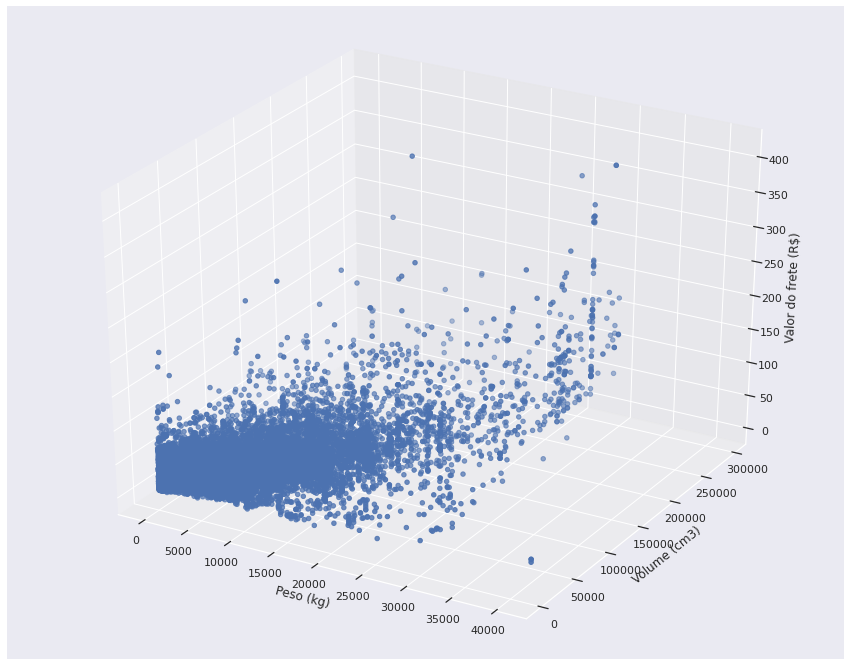

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,12))


ax = fig.add_subplot(111, projection = '3d')

x = final_df['product_weight_g']
y = final_df['product_volume_cm3']
z = final_df['freight_value']

ax.set_xlabel("Peso (kg)")
ax.set_ylabel("Volume (cm3)")
ax.set_zlabel("Valor do frete (R$)")

ax.scatter(x, y, z)

plt.show()

### **Distribuição de distância**

Analisados voluume e peso, agora vamos para a distribuição e dispersão da distância nos dados.

193


Text(0.5, 1.0, 'Distribuição de distância')

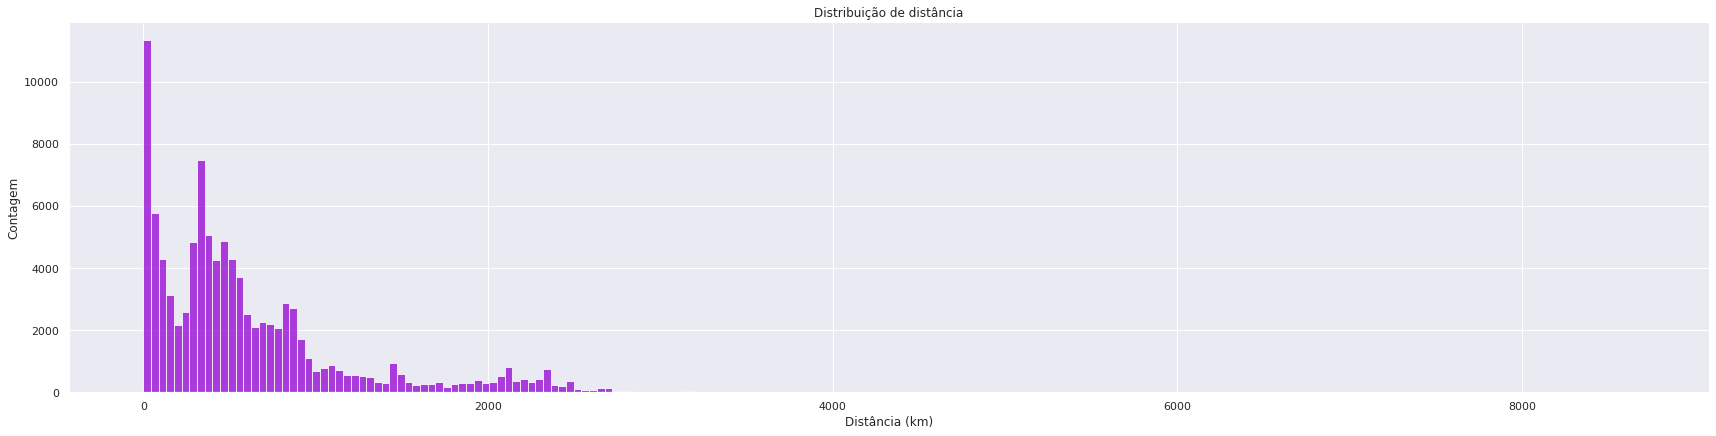

In [ ]:
#Scott's Rule
dist = final_df['distance']
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M - m)/h)
print(nclass)

g = sns.displot(final_df.distance,kde=False, bins = 'scott',color='darkviolet', height=6,aspect=4 )
g.set_axis_labels("Distância (km)", "Contagem")
g.set_titles("Distribuição de distância")
plt.title('Distribuição de distância')

**Análise**

Em um primieiro momento já fica claro que a cauda do gráfico é extremamente longa, sem indicios dos bins a quais elas pertencem. 


Também fica visível uma variação de distância que cai e aumenta. Essa faixa indica provavelmente a faixa de interseção entre fretes no mesmo estado e fretes interestaduais.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


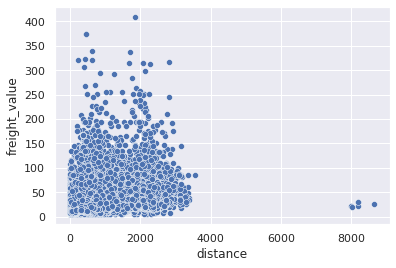

In [ ]:
sns.scatterplot(final_df['distance'], final_df['freight_value'])

**Análise**

Ao analisar melhor, agora com a dispersão de dados por distância, vemos os outliers com mais de 7000 km de distância.

Entretanto se o Brasil fosse um quadrado, a maior distância (diagonal) entre dois pontos do país seria de aproximadamente 6100 km. 

Portanto entende-se que esse grupo de dados representa algum frete internacional, o que não contribui ao treinamento.

Aqui foi tomada a decisão de remover esses dados mais adiante.


In [ ]:
# Gráfico de Scatterplot com linha de tendência da variável
#sns.regplot(final_df['distance'], final_df['freight_value'],ci = 50,scatter_kws={"color": "blue"}, line_kws={"color": "red", 'linewidth':2})

### **Distribuição de tempo de entrega**

240


Text(0.5, 1.0, 'Distribuição do tempo estimado de entrega')

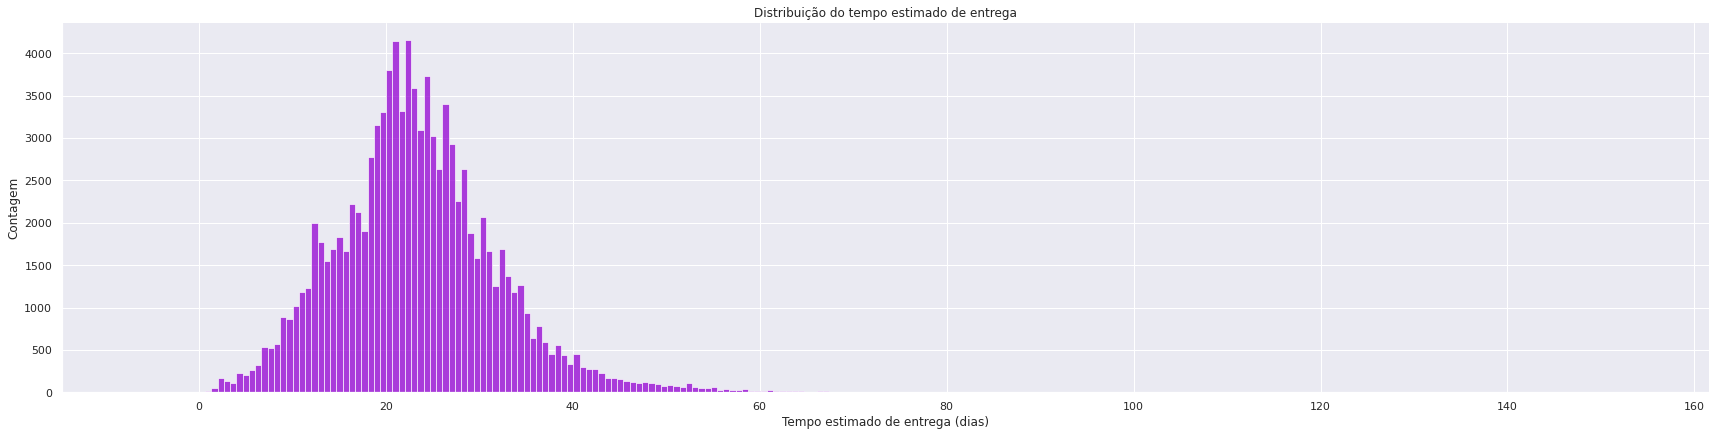

In [ ]:
#Scott's Rule
dist = final_df['tempo_horas']
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M - m)/h)
print(nclass)

g = sns.displot(final_df.tempo_horas/24,kde=False, bins = 'scott',color='darkviolet', height=6,aspect=4 )
g.set_axis_labels("Tempo estimado de entrega (dias)", "Contagem")
g.set_titles("Tempo estimado de entrega (dias)")
plt.title('Distribuição do tempo estimado de entrega')

**Análise**

Através do gráfico de distribuição do tempo de entrega notamos que existe um padrão limite para a maioria das entregas, entretanto há, como nos gráficos anteriores, outliers estranhos que indicam prazos estimados de mais de 5 meses para alguns produtos.

Com o comportamento normal/gaussiano predominante do gráfico, uma opção seria descartar os dados fora da faixa normal. Mas optamos por preservar essa faixa de dados, considerando o mundo real onde em 2018 por exemplo houveram greves diversas envolvendo setores logísticos, como de caminhoneiros, que podem ter impactado nas previsões de entrega.

Uma opção válida mas não implementada seria analisar, dentre essas anomalias, o tempo estimado e o tempo efetivo de entrega. Se houvesse concordância, talvez fosse melhor remover a entrada. Tempo de entrega do frete corresponde a uma faixa superior a 60% da razão de desistência de compras quando o motivo tem relação com o frete.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


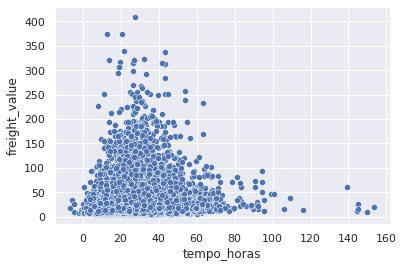

In [ ]:
sns.scatterplot(final_df['tempo_horas']/24, final_df['freight_value'])

**Análise**

Ao análisar a dispersão fica claro o que suspeitavamos, tempos muito altos de prazo alongaram a cauda do gráfico de distribuição. Há um volume baixo de dados, mesmo assim não os retiramos.

In [ ]:
## Gráfico de Scatterplot com linha de tendência da variável
#sns.regplot(final_df['tempo_horas']/24, final_df['freight_value'],ci = 50,scatter_kws={"color": "blue"}, line_kws={"color": "red", 'linewidth':2})

In [ ]:
#------------- Detalhamento da distribuição de faixas de prazo ao dividir o prazo em dias (24 bins). 
#------------- Nesses dados é possível ver um numero bem pequeno de dados com prazos muito acima do normal.
#np.histogram(final_df['tempo_horas']/24, bins = 'scott')

### Distribuição do preço do produto

472


Text(0.5, 1.0, 'Distribuição do preço do produto')

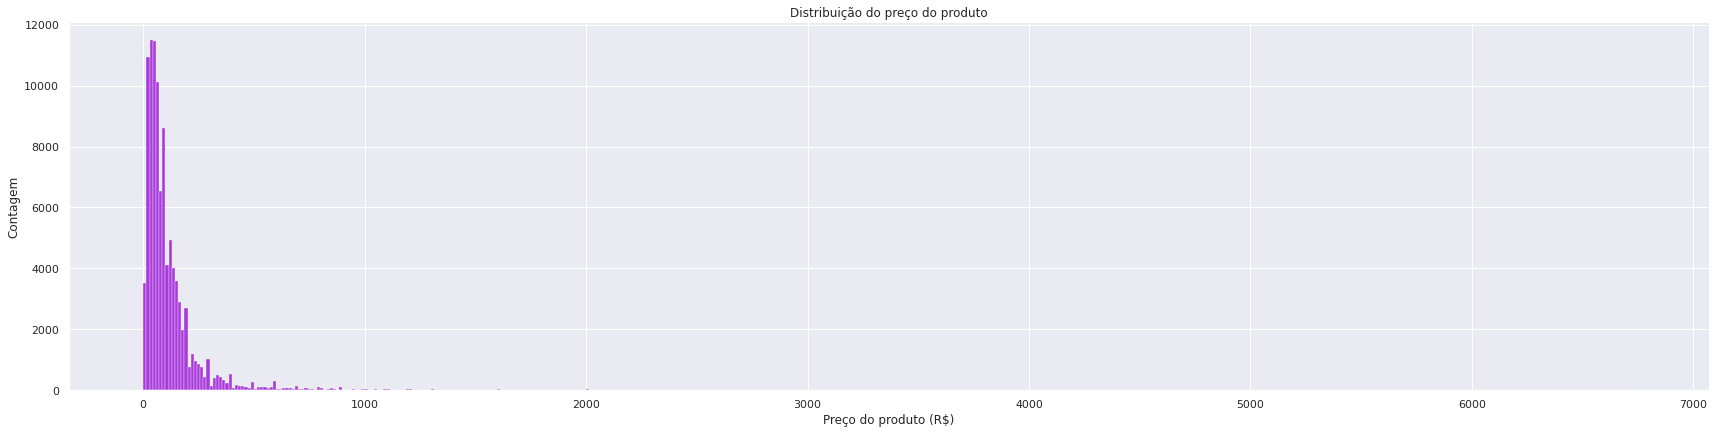

In [ ]:
#Scott's Rule
dist = final_df['price']
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M - m)/h)
print(nclass)

g = sns.displot(final_df.price,kde=False, bins = 'scott',color='darkviolet', height=6,aspect=4 )
g.set_axis_labels("Preço do produto (R$)", "Contagem")
g.set_titles("Tempo estimado de entrega (h)")
plt.title('Distribuição do preço do produto')

**Análise**

Como já haviamos notado durante a etapa de manuseio dos dataframes, há uma média de valor dos produtos na faixa de R$ 124,00 , mais de 80% dos produtos custam abaixo de 170 reais.

Nesse caso não há o que cortar ou considerar como corte para reduzir a cauda do gráfico. Todo tipo de produto pode ser comercializado. O que se sabe é que como o preço do produto consta em nota e incide no frete, esses outliers de preço tendem a ter um frete mais alto.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


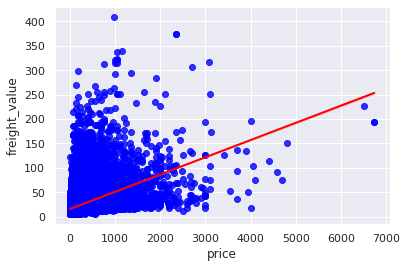

In [ ]:
sns.regplot(final_df['price'], final_df['freight_value'],ci = 50,scatter_kws={"color": "blue"}, line_kws={"color": "red", 'linewidth':2})

**Análise**

Para o preço optamos por manter todos os dados, observamos uma correlação boa entre o preço do produto e valor do frete. Por isso optamos em manter para essa variável o gráfico com a linha de tendência.


In [ ]:
#Gráfico sem linha de tendencia
#sns.scatterplot(final_df['price'], final_df['freight_value'])

### **Remoção de outliers e outros Scatter Plot 3D**

Como apresentado nos gráficos 2d a distância apresenta outliers que precisam ser removidos.

A seguir vemos como se comporta essa remoção gráficamente através de dois plots 3D, um pré remoção e outro pós remoção

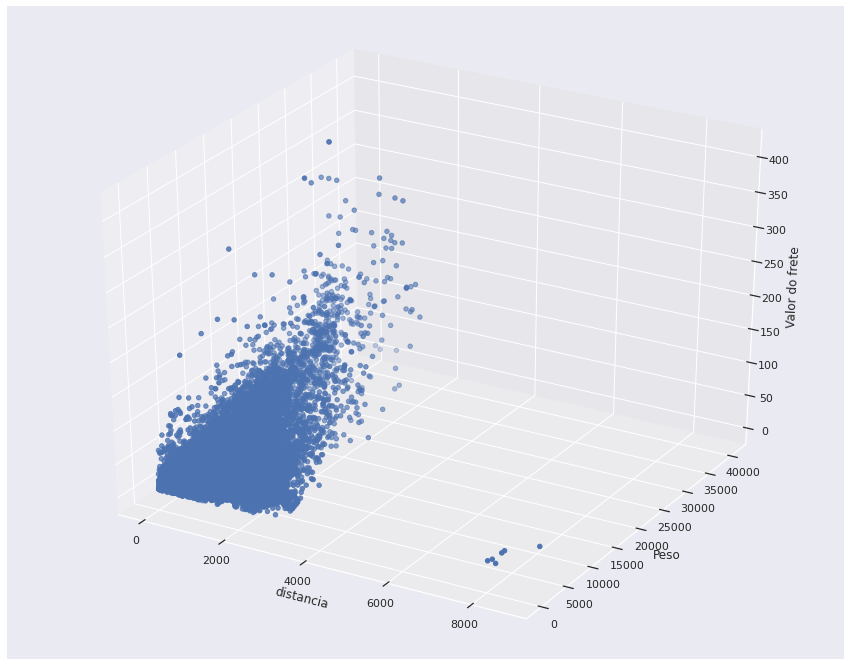

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,12))


ax = fig.add_subplot(111, projection = '3d')

#x = final_df['v_linear_cm']
#x = final_df['tempo_horas']
x = final_df['distance']
y = final_df['product_weight_g']
z = final_df['freight_value']

ax.set_xlabel("distancia")
ax.set_ylabel("Peso")
ax.set_zlabel("Valor do frete")

ax.scatter(x, y, z)

plt.show()

**Remoção de dados de distância maiores que 6000km**

In [ ]:
# Dropar distâncias maiores que 6100km, que seria a maior distancia em linha reta possível se o Brasil fosse um quadrado.
final_df = final_df[final_df['distance'] < 6000]
Catg1_final_df = Catg1_final_df[Catg1_final_df['distance'] < 6000]
Catg2_final_df = Catg2_final_df[Catg2_final_df['distance'] < 6000]

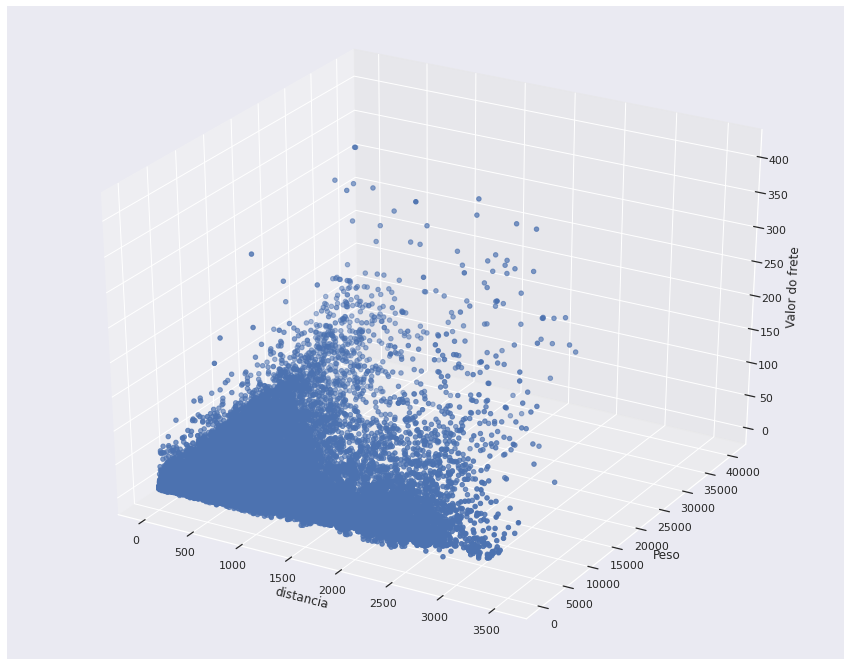

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,12))


ax = fig.add_subplot(111, projection = '3d')

#x = final_df['v_linear_cm']
#x = final_df['tempo_horas']
x = final_df['distance']
y = final_df['product_weight_g']
z = final_df['freight_value']

ax.set_xlabel("distancia")
ax.set_ylabel("Peso")
ax.set_zlabel("Valor do frete")

ax.scatter(x, y, z)

plt.show()

Como podemos observar o gráfico fica melhor e com mais sentido sem os outliers.

A seguir observamos mais algumas relações em 3D, aqui foram testados diversos plots para obter insights sobre os dados, mas de forma geral não conseguimos traçar uma razão para remoção de mais dados.

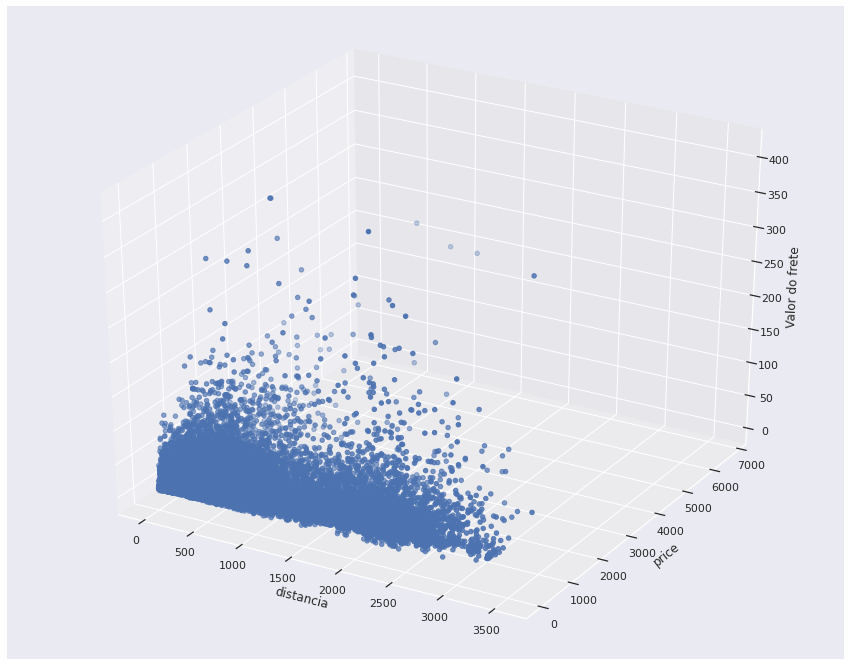

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,12))


ax = fig.add_subplot(111, projection = '3d')

#x = final_df['v_linear_cm']
#x = final_df['tempo_horas']
x = final_df['distance']
y = final_df['price']
z = final_df['freight_value']

ax.set_xlabel("distancia")
ax.set_ylabel("price")
ax.set_zlabel("Valor do frete")

ax.scatter(x, y, z)

plt.show()

**Análise**

Aqui uma tentativa de correlacionar alguns dos volumes mais altos, na faixa limite de uma operadora de frete, encontrados nos gráficos 2d, com a distância. Também sem sucesso em buscar uma correlação que pudesse ajudar a eliminar mais alguns outliers.

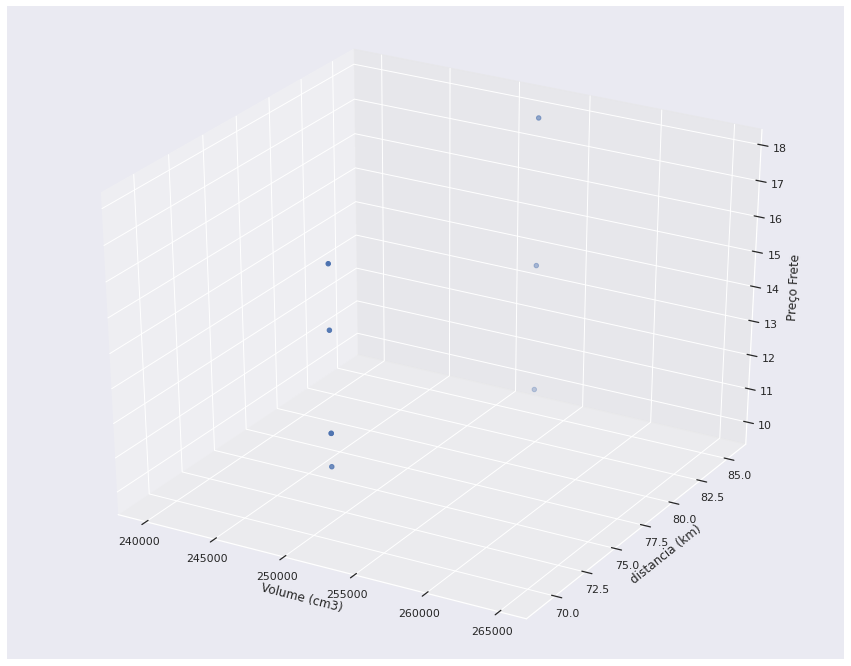

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,12))

filt = final_df[final_df['product_volume_cm3']>250000]
filt = filt[filt['freight_value']<50]

ax = fig.add_subplot(111, projection = '3d')

x = filt["product_volume_cm3"]
y = filt['price']
z = filt['freight_value']

ax.set_xlabel("Volume (cm3)")
ax.set_ylabel("distancia (km)")
ax.set_zlabel("Preço Frete")

ax.scatter(x, y, z)

plt.show()

## Divisão de dados

In [ ]:
#### Tratamento final dos conjuntos de dados para inicio da modelagem ####
#Algumas tentativas de rodar alguns métodos resultaram em um momento inicial em crash de memória
# devido ao limite do colab
#Por essa razão chegamos a criar versões reduzidas dos nossos dados.

#full_final_df = final_df

#
#msk = np.random.rand(len(final_df)) < 0.5
#final_df = final_df[msk]
#

#msk= np.random.rand(len(Catg1_final_df)) < 0.5
#Catg1_final_df = Catg1_final_df[msk]
#
#msk = np.random.rand(len(Catg2_final_df)) < 0.5
#Catg2_final_df = Catg2_final_df[msk]

Verificação do que restou dos dados no nosso dataframe final:

In [ ]:
display(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99505 entries, 0 to 101472
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               99505 non-null  object        
 1   product_id             99505 non-null  object        
 2   seller_id              99505 non-null  object        
 3   freight_value          99505 non-null  float64       
 4   product_weight_g       99505 non-null  float64       
 5   product_volume_cm3     99505 non-null  float64       
 6   dimensional_weight     99505 non-null  float64       
 7   price                  99505 non-null  float64       
 8   distance               99505 non-null  float64       
 9   customer_id            99505 non-null  object        
 10  date                   99505 non-null  datetime64[ns]
 11  product_category_name  99505 non-null  object        
 12  product_height_cm      99505 non-null  float64       
 13  

None

## **Normalização de dados**

A normalização vai ser feita com o **StandardScaler**, que  irá transformar os dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão de 1.

Aqui é feita a normalização para o conjunto de dados principal *final_df*, como também para os com alteração das categorias *catg1_final_df* e *catg2_final_df*.

In [ ]:
scaler = StandardScaler()

X = np.asanyarray(final_df.drop(columns=['product_category_name', 'date', 'order_id', 'product_id', 'freight_value' , 'seller_id', 'customer_id', 'dimensional_weight'  ]))
#Full_X = np.asanyarray(full_final_df.drop(columns=['product_category_name', 'date', 'order_id', 'product_id', 'freight_value' , 'seller_id', 'customer_id', 'dimensional_weight'  ]))
C1_X = np.asanyarray(Catg1_final_df.drop(columns=['date', 'order_id', 'product_id', 'freight_value' , 'seller_id', 'customer_id', 'dimensional_weight'  ]))
C2_X = np.asanyarray(Catg2_final_df.drop(columns=['date', 'order_id', 'product_id', 'freight_value' , 'seller_id', 'customer_id', 'dimensional_weight'  ]))

y = np.asanyarray(final_df[["freight_value"]])
#Full_y = y = np.asanyarray(full_final_df[["freight_value"]])
C1_y = np.asanyarray(Catg1_final_df[["freight_value"]])
C2_y = np.asanyarray(Catg2_final_df[["freight_value"]])

X = scaler.fit_transform(X, y)
#Full_X = scaler.fit_transform(Full_X,Full_y)
C1_X = scaler.fit_transform(C1_X,C1_y)
C2_X = scaler.fit_transform(C2_X,C2_y)

<br>
<br>
<br>
<br>


# **III)** **Hipótese I**: *Variáveis Originais - final_df*

A primeira hipótese é utilizar para o treinamento dos modelos todas as variáveis disponíveis e correlatas ao "freight_value"

São essas: 
 * Preço do Item, Volume, Peso, Distância Vendedor/Cliente, Tempo estimado de entrega, largura, comprimento e altura.

## Teste com modelo polinomial

O primeiro modelo a ser testado é o modelo polinomial dada sua simplicidade.

In [ ]:
# test_size determina o percentual de dados para teste, complementar ao percentual de dados para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #determina os conjuntos de treino e teste dentro do dataframe

#Declaração de propriedades do modelo polinomial
# degree é o grau da equação da curva a ser utilizado

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(X_train)

clf = linear_model.LinearRegression()
clf.fit(train_x_poly, y_train)

LinearRegression()

In [ ]:
test_x_poly = poly.fit_transform(X_test)
poly_test_y = clf.predict(test_x_poly)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, poly_test_y ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, poly_test_y ))
print("R2-score: %.2f" % r2_score(y_test, poly_test_y ) )
print(mean_absolute_percentage_error(y_test, poly_test_y))

Erro absoluto médio: 4.58
Soma de quadrados residual (MSE): 87.07
R2-score: 0.68
0.20179867867329568


### Adaboost - Polinomial

In [ ]:
poly = PolynomialFeatures(degree=3) #não mude o grau... é assustador... grau 5 = 15 min e o erro só aumenta
train_x_poly = poly.fit_transform(X_train)

ada_clf = linear_model.LinearRegression()

In [ ]:
regressor_3 = AdaBoostRegressor(ada_clf)
regressor_3.fit(train_x_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=LinearRegression())

In [ ]:
test_x_poly = poly.fit_transform(X_test)
test_y_ = regressor_3.predict(test_x_poly)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, test_y_ ) )

Erro absoluto médio: 5.74
Soma de quadrados residual (MSE): 110.38
R2-score: 0.53


### Validação cruzada

R2-score

In [ ]:
x_poly = poly.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(clf, x_poly, y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly, y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly, y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.6647546919738598 e o desvio padrão é 0.01667481021332335
A média MAE dos folds é 4.515261283405202 e o desvio padrão é 0.0328586440346957
A média MSE dos folds é 84.93086749465212 e o desvio padrão é 5.239368117442415


Vamos analisar a distribuição dos dados de teste e da previsão do nosso modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


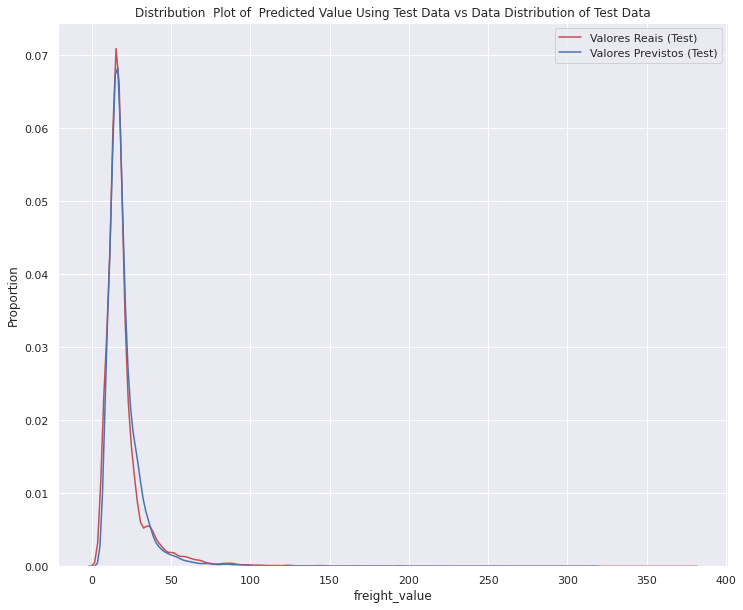

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, poly_test_y,"Valores Reais (Test)","Valores Previstos (Test)",Title)

205


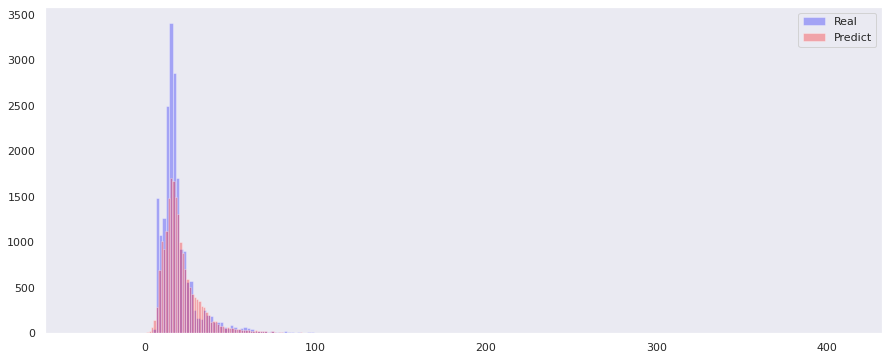

In [ ]:
#Scott's Rule
dist = y_test
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M[0] - m[0])/h)
print(nclass)

fig, ax = plt.subplots(figsize=(15,6),nrows=1, ncols=1)
ax.hist(y_test, bins=nclass, color='blue', alpha=0.3, label='Real')
ax.hist(test_y_, bins=nclass, color='red', alpha=0.3, label='Predict')

ax.grid()
ax.legend()

### Comparação de valores previstos com valores reais.

In [ ]:
polinomial_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
polinomial_df[["freight_value predict"]] = clf.predict(poly.fit_transform(X))
polinomial_df.to_csv('polinomial.csv')
polinomial_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,11.236230
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,9.636804
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,15.114387
3,350.00,355.470000,353.165139,44460.0,8950.0,36.53,32.630300
4,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,88.642972
...,...,...,...,...,...,...,...
101468,199.90,969.829722,647.764937,42000.0,3750.0,18.14,24.517177
101469,12.99,277.828333,285.193155,2400.0,200.0,12.79,11.653115
101470,199.00,513.191667,312.694516,14157.0,3050.0,17.87,19.620951
101471,239.90,444.913056,587.745579,60000.0,30000.0,19.93,52.422004


## Teste com Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, np.ravel(y_train))
random_test_y_ = regressor.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, random_test_y_))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, random_test_y_))
print("R2-score: %.2f" % r2_score(y_test, random_test_y_ ) )
print(mean_absolute_percentage_error(y_test, random_test_y_))

Erro absoluto médio: 3.85
Soma de quadrados residual (MSE): 65.60
R2-score: 0.74
0.17157456823547845


In [ ]:
print(random_test_y_)

[21.9395 16.2076 34.0182 ... 13.6836 15.0424 17.1308]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


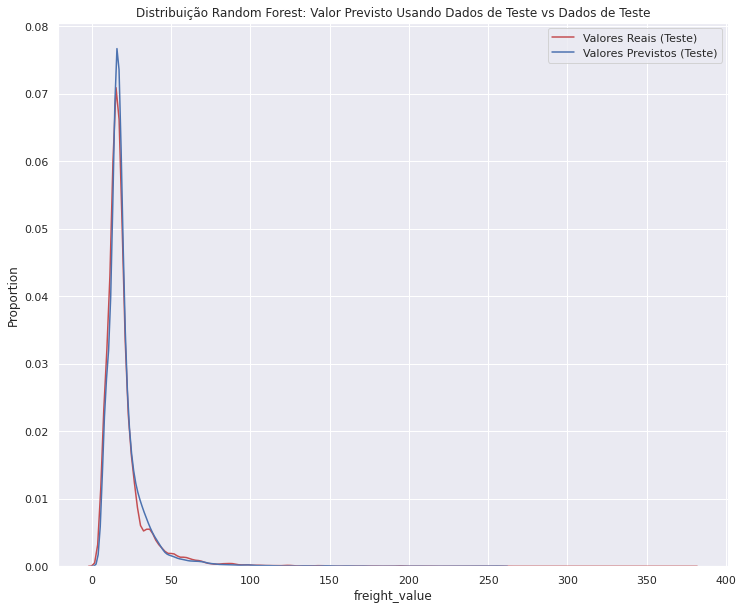

In [ ]:
Title = 'Distribuição Random Forest: Valor Previsto Usando Dados de Teste vs Dados de Teste'
DistributionPlot(y_test, random_test_y_,"Valores Reais (Teste)","Valores Previstos (Teste)",Title)

181


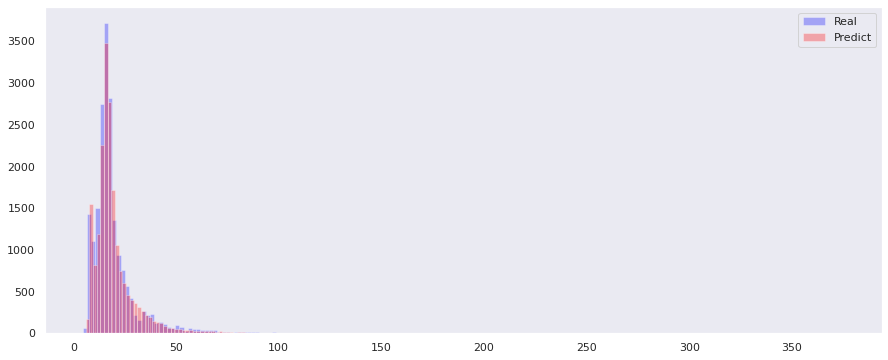

In [ ]:
#Scott's Rule
dist = y_test
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M[0] - m[0])/h)
print(nclass)

fig, ax = plt.subplots(figsize=(15,6),nrows=1, ncols=1)
ax.hist(y_test, bins=nclass, color='blue', alpha=0.3, label='Real',stacked = True)
ax.hist(random_test_y_, bins='scott', color='red', alpha=0.3, label='Predict',stacked = True)

ax.grid()
ax.legend()

### Adaboost - Random Forest

In [ ]:
#regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#regressor.fit(X_train, y_train)
#random_test_y_ = regressor.predict(X_test)

regressor_2 = AdaBoostRegressor(regressor)
#regressor_2.fit(X_train, np.ravel(y_train))


In [ ]:
random_test_y_2 = regressor_2.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, random_test_y_2))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, random_test_y_2))
print("R2-score: %.2f" % r2_score(y_test, random_test_y_2 ) )

### Validação cruzada

In [ ]:
RandomFGrid = RandomForestRegressor()
parametros = {'n_estimators':[50,100]}

kf = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(estimator = RandomFGrid,          # É o nosso modelo.
                    param_grid = parametros,  # É aquele dicionário com valores para serem testados.
                    scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error' ], 
                    cv = kf,
                    refit = 'neg_mean_absolute_error')

grid.fit(X, np.ravel(y))
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
0,32.100506,0.219531,0.468313,0.004831,50,{'n_estimators': 50},0.726090,0.724040,0.722001,0.726226,0.702491,0.720169,0.008973,2,-3.824360,-3.830559,-3.911120,-3.963119,-3.922231,-3.890278,0.054171,2,-68.670864,-67.045350,-72.270795,-72.920363,-72.762990,-70.734072,2.413354,2
1,65.859418,2.479354,0.976385,0.087097,100,{'n_estimators': 100},0.728887,0.728479,0.728847,0.731517,0.704171,0.724380,0.010163,1,-3.806334,-3.796017,-3.867763,-3.926764,-3.886624,-3.856701,0.049287,1,-67.969779,-65.966711,-70.490972,-71.511124,-72.352179,-69.658153,2.360602,1


### Grid Search - Random Forest

In [ ]:
RandomFGrid = RandomForestRegressor()
parametros = {'n_estimators':[50, 100, 300, 500]}

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(estimator = RandomFGrid,          # É o nosso modelo.
                    param_grid = parametros,  # É aquele dicionário com valores para serem testados.
                    scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error' ], 
                    cv = kf,
                    refit = 'neg_mean_absolute_error')       

In [ ]:
#grid.fit(X, np.ravel(y))
#pd.DataFrame(grid.cv_results_)

KeyboardInterrupt: ignored

### Comparação de valores previstos com valores reais

In [ ]:
randomf_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
#randomf_df[["freight_value predict"]] = regressor.predict(X)
randomf_df.to_csv('randomf.csv')
randomf_df

## Teste com KNN Regressor

In [ ]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
neigh_test_y_ = neigh.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, neigh_test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, neigh_test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, neigh_test_y_ ) )


Erro absoluto médio: 4.30
Soma de quadrados residual (MSE): 82.72
R2-score: 0.67


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


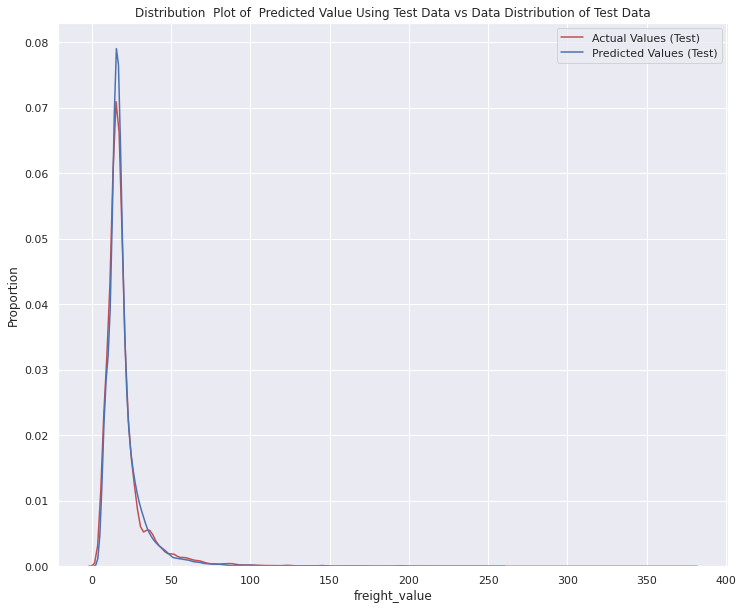

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, neigh_test_y_,"Actual Values (Test)","Predicted Values (Test)",Title)

181
145


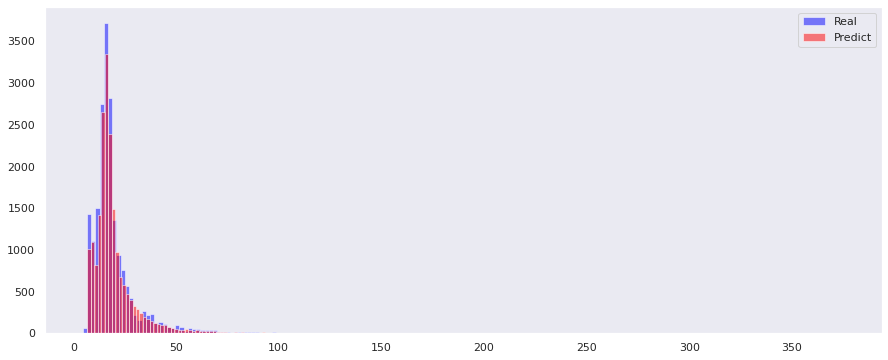

In [ ]:
#Scott's Rule
dist = y_test
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M[0] - m[0])/h)
print(nclass)

dist2 = neigh_test_y_
n = len(dist2)
h = 3.49 * np.std(dist2) * (n**(-1/3))
m = min(dist2)
M = max(dist2)
nclass2 = round((M[0] - m[0])/h)
print(nclass2)

fig, ax = plt.subplots(figsize=(15,6),nrows=1, ncols=1)
count, bins, patches = ax.hist(y_test, bins='scott', color='blue', alpha=0.5, label='Real',stacked = True);
count, bins, patches = ax.hist(neigh_test_y_, bins='scott', color='red', alpha=0.5, label='Predict', stacked = True);

ax.grid()
ax.legend()

### Validação Cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(neigh, X, y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh, X, y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh, X, y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.6491435029237186 e o desvio padrão é 0.013438298252157824
A média MAE dos folds é 4.330006070046731 e o desvio padrão é 0.07551227555453054
A média MSE dos folds é 87.69719661938595 e o desvio padrão é 7.099076957256176


### Grid Search KNN Regressor

In [ ]:
KNNGrid = KNeighborsRegressor()
parametros = {'n_neighbors':[5, 10, 20, 40],
              'weights':['uniform', 'distance'],
              'leaf_size': [30, 40, 50]}

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
grid = GridSearchCV(estimator = KNNGrid,          # É o nosso modelo.
                    param_grid = parametros,  # É aquele dicionário com valores para serem testados.
                    scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error' ], 
                    cv = kf,
                    refit = 'neg_mean_absolute_error')    

In [ ]:
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)

KeyboardInterrupt: ignored

### Comparação de valores previstos com valores reais

In [ ]:
knn_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
knn_df[["freight_value predict"]] = neigh.predict(X)
knn_df.to_csv('knn.csv')
knn_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,11.214
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,8.086
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,15.034
3,350.00,355.470000,353.165139,44460.0,8950.0,36.53,16.600
4,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,90.480
...,...,...,...,...,...,...,...
101468,199.90,969.829722,647.764937,42000.0,3750.0,18.14,25.538
101469,12.99,277.828333,285.193155,2400.0,200.0,12.79,14.232
101470,199.00,513.191667,312.694516,14157.0,3050.0,17.87,21.024
101471,239.90,444.913056,587.745579,60000.0,30000.0,19.93,38.456


## Comparação entre Polinomial - Random Forest - KNN

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

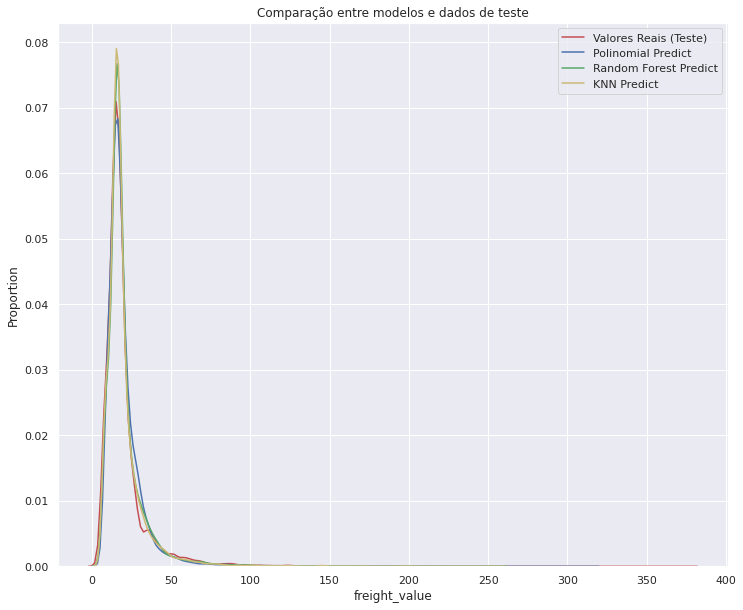

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label='Valores Reais (Teste)')
ax2 = sns.distplot(poly_test_y, hist=False, color="b", label= 'Polinomial Predict', ax=ax1)
ax3 = sns.distplot(random_test_y_, hist=False, color="g", label= 'Random Forest Predict', ax=ax1)
ax4 = sns.distplot(neigh_test_y_, hist=False, color="y", label= 'KNN Predict', ax=ax1)
    
#ax1 = sns.histplot(RedFunction, color="r", label=RedName)
#ax2 = sns.histplot(BlueFunction, color="b", label=BlueName, ax=ax1)
Title = 'Comparação entre modelos e dados de teste'
plt.title(Title)
plt.xlabel('freight_value')
plt.ylabel('Proportion')
plt.legend()
plt.show()
plt.close()

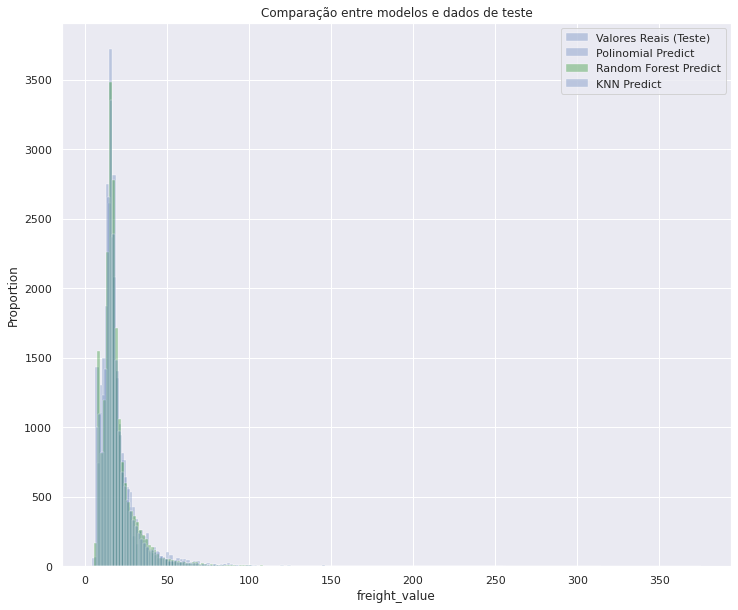

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.histplot(y_test, bins = 'scott',  color="red", alpha=0.3, label='Valores Reais (Teste)')
ax2 = sns.histplot(poly_test_y, bins = 'scott', color="blue",alpha=0.3, label= 'Polinomial Predict', ax=ax1)
ax3 = sns.histplot(random_test_y_, bins = 'scott', color="green",alpha=0.3, label= 'Random Forest Predict', ax=ax1)
ax4 = sns.histplot(neigh_test_y_, bins = 'scott', color="yellow",alpha=0.3, label= 'KNN Predict', ax=ax1)
    
#ax1 = sns.histplot(RedFunction, color="r", label=RedName)
#ax2 = sns.histplot(BlueFunction, color="b", label=BlueName, ax=ax1)
Title = 'Comparação entre modelos e dados de teste'
plt.title(Title)
plt.xlabel('freight_value')
plt.ylabel('Proportion')
plt.legend()
plt.show()
plt.close()

## Ridge Regression

In [ ]:
ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_test_y_ = ridge.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, ridge_test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, ridge_test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, ridge_test_y_ ) )


Erro absoluto médio: 5.10
Soma de quadrados residual (MSE): 96.49
R2-score: 0.62


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


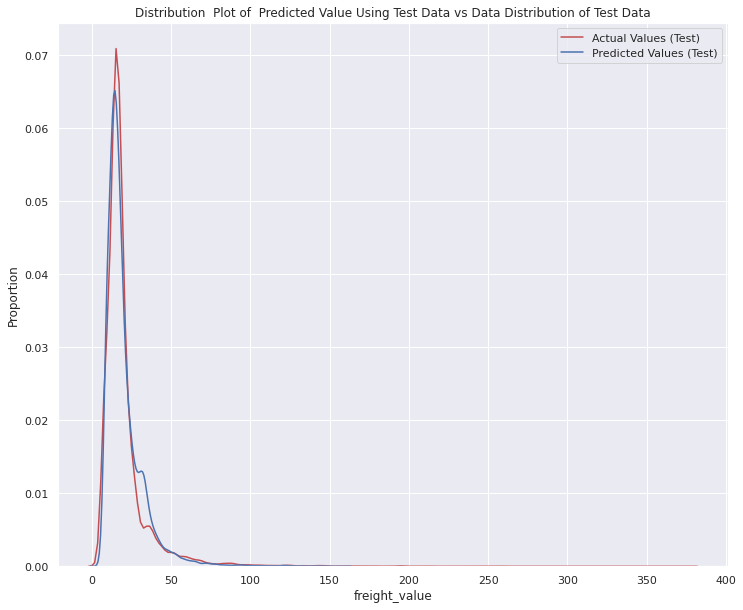

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, ridge_test_y_,"Actual Values (Test)","Predicted Values (Test)",Title)

181
97


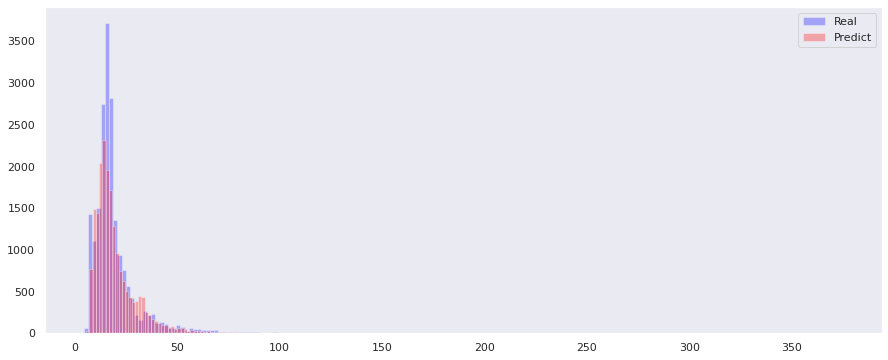

In [ ]:
#Scott's Rule
dist = y_test 
n = len(dist)
h = 3.49 * np.std(dist) * (n**(-1/3))
m = min(dist)
M = max(dist)
nclass = round((M[0] - m[0])/h)
print(nclass)

dist2 = ridge_test_y_ 
n = len(dist2)
h = 3.49 * np.std(dist2) * (n**(-1/3))
m = min(dist2)
M = max(dist2)
nclass2 = round((M[0] - m[0])/h)
print(nclass2)

fig, ax = plt.subplots(figsize=(15,6),nrows=1, ncols=1)
ax.hist(y_test, bins=nclass, color='blue', alpha=0.3, label='Real')
ax.hist(ridge_test_y_, bins=nclass2, color='red', alpha=0.3, label='Predict')

ax.grid()
ax.legend()

### Validação cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(ridge, X, y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(ridge, X, y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(ridge, X, y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.6078147832983819 e o desvio padrão é 0.013647818400966589
A média MAE dos folds é 5.145621050917737 e o desvio padrão é 0.0302820349598087
A média MSE dos folds é 99.01193432159563 e o desvio padrão é 3.28415639728742


### Comparação de valores previstos com valores reais

In [ ]:
ridge_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
ridge_df[["freight_value predict"]] = ridge.predict(X)
ridge_df.to_csv('ridge.csv')
ridge_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,10.638015
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,8.169767
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,13.113967
3,350.00,355.470000,353.165139,44460.0,8950.0,36.53,35.444941
4,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,62.890540
...,...,...,...,...,...,...,...
101468,199.90,969.829722,647.764937,42000.0,3750.0,18.14,28.579844
101469,12.99,277.828333,285.193155,2400.0,200.0,12.79,10.595518
101470,199.00,513.191667,312.694516,14157.0,3050.0,17.87,18.809216
101471,239.90,444.913056,587.745579,60000.0,30000.0,19.93,70.952848


## Decision Tree Regression

In [ ]:
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)
dtree_test_y_ = dtree.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, dtree_test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, dtree_test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, dtree_test_y_ ) )

Erro absoluto médio: 5.10
Soma de quadrados residual (MSE): 140.25
R2-score: 0.45


### Validação cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(dtree, X, y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(dtree, X, y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(dtree, X, y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.4671781258813925 e o desvio padrão é 0.004580288369600006
A média MAE dos folds é 5.128775522168065 e o desvio padrão é 0.07877908098283637
A média MSE dos folds é 128.64074334717964 e o desvio padrão é 4.308652964671848


### Comparação de valores previstos com valores reais

In [ ]:
dtree_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
#dtree_df[["freight_value predict"]] = dtree.predict(X)
dtree_df.to_csv('dtree.csv')
dtree_df

,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value
0,43.00,438.829722,134.665951,1710.0,600.0,12.79
1,55.99,239.924444,71.690647,8000.0,100.0,8.72
2,99.90,390.759722,338.223211,9576.0,967.0,16.95
3,350.00,355.470000,353.165139,44460.0,8950.0,36.53
4,299.99,547.816389,2742.331873,53400.0,10150.0,43.41
...,...,...,...,...,...,...
101468,199.90,969.829722,647.764937,42000.0,3750.0,18.14
101469,12.99,277.828333,285.193155,2400.0,200.0,12.79
101470,199.00,513.191667,312.694516,14157.0,3050.0,17.87
101471,239.90,444.913056,587.745579,60000.0,30000.0,19.93


## Robust Regression - Ransac

In [ ]:
ransac = RANSACRegressor(base_estimator=None,
		max_trials=4, 		# Number of Iterations
		min_samples=2, 		# Minimum size of the sample
		loss='absolute_loss', 	# Metrics for loss
		residual_threshold=10 	# Threshold
		)

# Train model
ransac.fit(X_train, y_train)

ransac_test_y_ = ransac.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, ransac_test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, ransac_test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, ransac_test_y_ ) )

Erro absoluto médio: 5.31
Soma de quadrados residual (MSE): 140.78
R2-score: 0.45


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


### Validação Cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(ransac, X, y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(ransac, X, y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(ransac, X, y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

A média R2 dos folds é 0.29560089570611436 e o desvio padrão é 0.10852683581878918


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


A média MAE dos folds é 5.632122170254066 e o desvio padrão é 0.14130948995088158


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


A média MSE dos folds é 181.49390051427557 e o desvio padrão é 16.989868537438635


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


### Comparação de valores previstos com valores reais

In [ ]:
ransac_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
ransac_df[["freight_value predict"]] = ransac.predict(X)
ransac_df.to_csv('ransac.csv')
ransac_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,12.896109
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,10.604203
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,13.793318
3,350.00,355.470000,353.165139,44460.0,8950.0,36.53,26.321594
4,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,48.753651
...,...,...,...,...,...,...,...
101468,199.90,969.829722,647.764937,42000.0,3750.0,18.14,23.393087
101469,12.99,277.828333,285.193155,2400.0,200.0,12.79,11.221470
101470,199.00,513.191667,312.694516,14157.0,3050.0,17.87,19.180542
101471,239.90,444.913056,587.745579,60000.0,30000.0,19.93,42.708891


## Rede neural

In [ ]:
def create_network():
  model = Sequential()
 
  # Defining the Input layer and FIRST hidden layer, both are same!
  #model.add(Dense(units=20, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
  model.add(Dense(units=20, input_dim=8, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=50, kernel_initializer='normal', activation='tanh'))

  # Defining the Third layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=60, kernel_initializer='normal', activation='tanh'))

  # Defining the Fourth layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=50, kernel_initializer='normal', activation='tanh'))

  # Defining the Fifth layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

In [ ]:
def plot_metrics(history):

  fig, axes = plt.subplots(1,2, True,figsize=(12,7))
  print(history.history.keys())
  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'], label='train')
  axes[0].plot(history.history['val_categorical_accuracy'], label='test')
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'], label='train')
  axes[1].plot(history.history['val_loss'], label='test')
  axes[1].set_title('Erro')

  plt.xlabel('Épocas')

  axes[0].legend(loc='best')
  axes[1].legend(loc='best')
  plt.show()

In [ ]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=20, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))

 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=50, kernel_initializer='normal', activation='tanh'))

# Defining the Third layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=60, kernel_initializer='normal', activation='tanh'))

# Defining the Fourth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=50, kernel_initializer='normal', activation='tanh'))

# Defining the Fifth layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train , epochs = 25, verbose=1)  #batch_size = 20,

Epoch 1/25
2488/2488 [==============================] - 6s 2ms/step - loss: 300.4889
Epoch 2/25
2488/2488 [==============================] - 5s 2ms/step - loss: 161.8128
Epoch 3/25
2488/2488 [==============================] - 5s 2ms/step - loss: 127.8608
Epoch 4/25
2488/2488 [==============================] - 5s 2ms/step - loss: 114.0112
Epoch 5/25
2488/2488 [==============================] - 5s 2ms/step - loss: 106.5248
Epoch 6/25
2488/2488 [==============================] - 5s 2ms/step - loss: 101.2875
Epoch 7/25
2488/2488 [==============================] - 5s 2ms/step - loss: 98.3143
Epoch 8/25
2488/2488 [==============================] - 5s 2ms/step - loss: 96.1526
Epoch 9/25
2488/2488 [==============================] - 5s 2ms/step - loss: 94.4134
Epoch 10/25
2488/2488 [==============================] - 5s 2ms/step - loss: 93.2664
Epoch 11/25
2488/2488 [==============================] - 5s 2ms/step - loss: 92.5639
Epoch 12/25
2488/2488 [==============================] - 5s 2ms/step

In [ ]:
y_pred = model.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, y_pred ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, y_pred ))
print("R2-score: %.2f" % r2_score(y_test, y_pred ) )

Erro absoluto médio: 4.78
Soma de quadrados residual (MSE): 91.37
R2-score: 0.64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


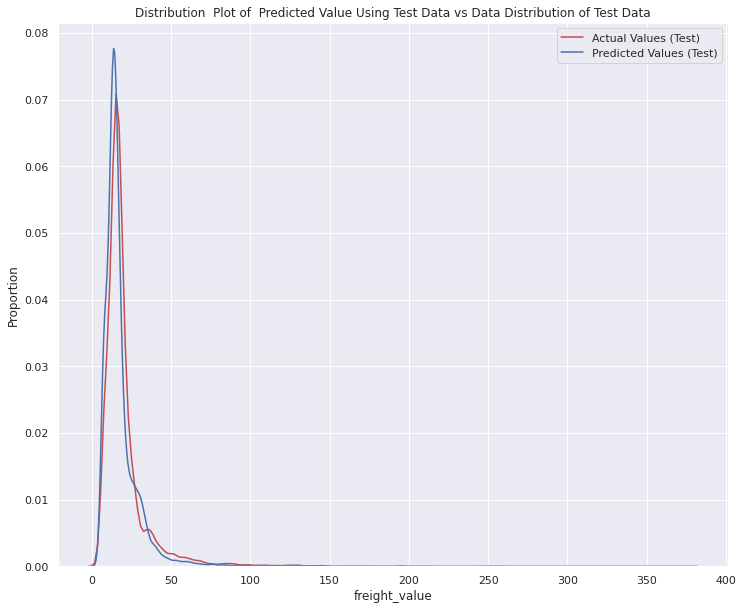

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, y_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
neural_df = final_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
neural_df[["freight_value predict"]] = model.predict(X)
neural_df.to_csv('rede_neural.csv')
neural_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,9.643890
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,6.880383
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,12.704144
3,350.00,355.470000,353.165139,44460.0,8950.0,36.53,27.177425
4,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,99.895279
...,...,...,...,...,...,...,...
101468,199.90,969.829722,647.764937,42000.0,3750.0,18.14,22.231359
101469,12.99,277.828333,285.193155,2400.0,200.0,12.79,9.664364
101470,199.00,513.191667,312.694516,14157.0,3050.0,17.87,16.893070
101471,239.90,444.913056,587.745579,60000.0,30000.0,19.93,50.290276


### Validação Cruzada

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasRegressor(build_fn=create_network, 
                                 epochs=10, 
                                 verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [ ]:
# Evaluate neural network using five-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
cross_val_score(neural_network, X, y, cv=kf)

array([ -90.2102356 , -103.85778046,  -90.01319122,  -91.7213974 ,
        -86.60282898])

In [ ]:
print("A média dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média dos folds é 181.49390051427557 e o desvio padrão é 16.989868537438635


In [ ]:
Rcross = -1 * cross_val_score(neural_network, X, y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross

array([4.63184858, 4.79611503, 5.10782806, 4.41649622, 4.70047139])

In [ ]:
print("A média dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média dos folds é 4.730551856029502 e o desvio padrão é 0.22623615179309714


In [ ]:
Rcross = -1 * cross_val_score(neural_network, X, y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross

array([102.41236571,  92.90597343,  87.89186035,  92.58547602,
        92.64166548])

In [ ]:
print("A média dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média dos folds é 93.68746819904793 e o desvio padrão é 4.746192810536591


## Conclusão - Hipótese I

Os melhores modelos treinados durante a hipótese 1 foram a regressão Polinomial (grau 3), Random Forest Regressor e KNN Regressor, dessa forma para o teste de outras hipóteses, estes serão os modelos utilizados.

# **IV) Hipótese II:** Análise por faixa de peso

## Separando dataframes com base em peso >= 3500 e <3500

In [ ]:
hip2a_df = final_df[final_df['product_weight_g'] >= 3500]
hip2a_df = hip2a_df.reset_index()
hip2b_df = final_df[final_df['product_weight_g'] < 3500]
hip2b_df = hip2b_df.reset_index()

In [ ]:
display(hip2a_df.info())
print('----------------')
display(hip2b_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  15523 non-null  int64         
 1   order_id               15523 non-null  object        
 2   product_id             15523 non-null  object        
 3   seller_id              15523 non-null  object        
 4   freight_value          15523 non-null  float64       
 5   product_weight_g       15523 non-null  float64       
 6   product_volume_cm3     15523 non-null  float64       
 7   dimensional_weight     15523 non-null  float64       
 8   price                  15523 non-null  float64       
 9   distance               15523 non-null  float64       
 10  customer_id            15523 non-null  object        
 11  date                   15523 non-null  datetime64[ns]
 12  product_category_name  15523 non-null  object        
 13  p

None

----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  83982 non-null  int64         
 1   order_id               83982 non-null  object        
 2   product_id             83982 non-null  object        
 3   seller_id              83982 non-null  object        
 4   freight_value          83982 non-null  float64       
 5   product_weight_g       83982 non-null  float64       
 6   product_volume_cm3     83982 non-null  float64       
 7   dimensional_weight     83982 non-null  float64       
 8   price                  83982 non-null  float64       
 9   distance               83982 non-null  float64       
 10  customer_id            83982 non-null  object        
 11  date                   83982 non-null  datetime64[ns]
 12  product_category_name  83982 non-null  obje

None

In [ ]:
scaler = StandardScaler()

X1 = np.asanyarray(hip2a_df.drop(columns=['index', 'date', 'order_id', 'product_id', 'freight_value' ,'product_category_name', 'seller_id', 'customer_id', 'dimensional_weight'  ]))
y1 = np.asanyarray(hip2a_df[["freight_value"]])

X1 = scaler.fit_transform(X1, y1)

In [ ]:
scaler = StandardScaler()

X2 = np.asanyarray(hip2b_df.drop(columns=['index','date', 'order_id', 'product_id', 'freight_value' ,'product_category_name', 'seller_id', 'customer_id', 'dimensional_weight'  ]))
'product_category_name', 'date', 'order_id', 'product_id', 'freight_value' , 'seller_id', 'customer_id', 'dimensional_weight'

y2 = np.asanyarray(hip2b_df[["freight_value"]])

X2 = scaler.fit_transform(X2, y2)

## Polinomial >= 3500

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

poly1 = PolynomialFeatures(degree=3)
train_x_poly1 = poly1.fit_transform(X_train1)

clf1 = linear_model.LinearRegression()
clf1.fit(train_x_poly1, y_train1)

LinearRegression()

In [ ]:
test_x_poly1 = poly1.fit_transform(X_test1)
test_y_1 = clf1.predict(test_x_poly1)

print("Erro absoluto médio: %.2f" % np.mean(np.absolute(test_y_1 - y_test1)))
print("Soma de quadrados residual (MSE): %.2f" % np.mean((test_y_1 - y_test1) ** 2))
print("R2-score: %.2f" % r2_score(y_test1, test_y_1 ) )

Erro absoluto médio: 11.73
Soma de quadrados residual (MSE): 354.29
R2-score: 0.58


#### Validação cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

x_poly1 = poly.fit_transform(X1)

Rcross = cross_val_score(clf1, x_poly1, y1, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf1, x_poly1, y1, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly1, y1, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.588986831959611 e o desvio padrão é 0.010242088250120945
A média MAE dos folds é 11.778079058243055 e o desvio padrão é 0.21602098734072983
A média MSE dos folds é 369.85526547566894 e o desvio padrão é 27.303712148272822


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


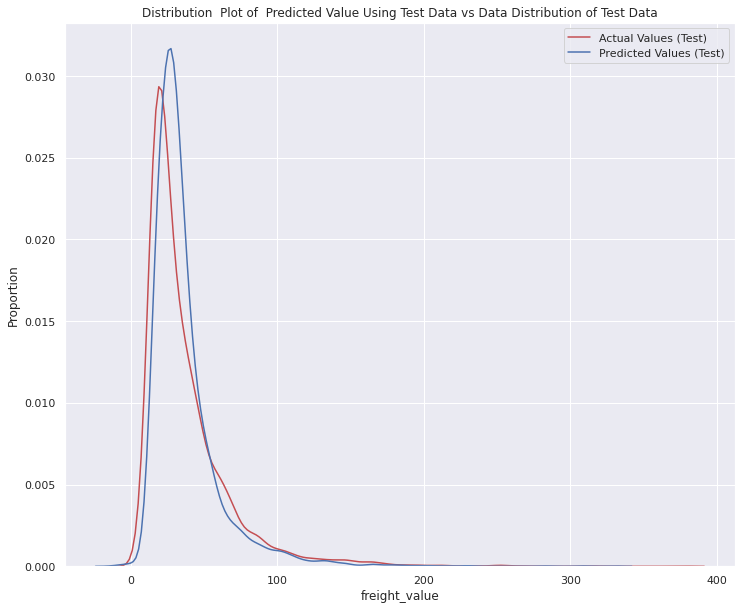

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test1, test_y_1,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
polinomial_df1 = hip2a_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
polinomial_df1[["freight_value predict"]] = clf1.predict(poly1.fit_transform(X1))
polinomial_df1.to_csv('polinomial1.csv')
polinomial_df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,350.00,355.470000,353.165139,44460.0,8950.0,36.53,30.033532
1,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,92.712061
2,92.00,337.062500,26.963269,96000.0,16050.0,31.60,29.485892
3,129.90,517.068056,147.161653,8000.0,4550.0,18.80,21.575341
4,94.00,685.759167,341.615404,57200.0,16550.0,21.50,24.120265
...,...,...,...,...,...,...,...
15518,219.90,575.413333,685.470930,44100.0,9800.0,16.98,40.402451
15519,119.99,828.830278,256.688692,56430.0,9375.0,44.40,28.185407
15520,810.00,463.403333,547.896198,118125.0,13805.0,70.75,68.762290
15521,199.90,969.829722,647.764937,42000.0,3750.0,18.14,23.476888


## Polinomial < 3500

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

poly2 = PolynomialFeatures(degree=3)
train_x_poly2 = poly2.fit_transform(X_train2)

clf2 = linear_model.LinearRegression()
clf2.fit(train_x_poly2, y_train2)

LinearRegression()

In [ ]:
test_x_poly2 = poly2.fit_transform(X_test2)
test_y_2 = clf2.predict(test_x_poly2)

print("Erro absoluto médio: %.2f" % np.mean(np.absolute(test_y_2 - y_test2)))
print("Soma de quadrados residual (MSE): %.2f" % np.mean((test_y_2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(y_test2, test_y_2 ) )

Erro absoluto médio: 3.18
Soma de quadrados residual (MSE): 33.20
R2-score: 0.55


#### Validação cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

x_poly2 = poly.fit_transform(X2)

Rcross = cross_val_score(clf2, x_poly2, y2, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf2, x_poly2, y2, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf2, x_poly2, y2, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.5136519209012997 e o desvio padrão é 0.056560223817268544
A média MAE dos folds é 3.177905439444359 e o desvio padrão é 0.028906855736365655
A média MSE dos folds é 35.13739825549414 e o desvio padrão é 2.6696818728717275


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


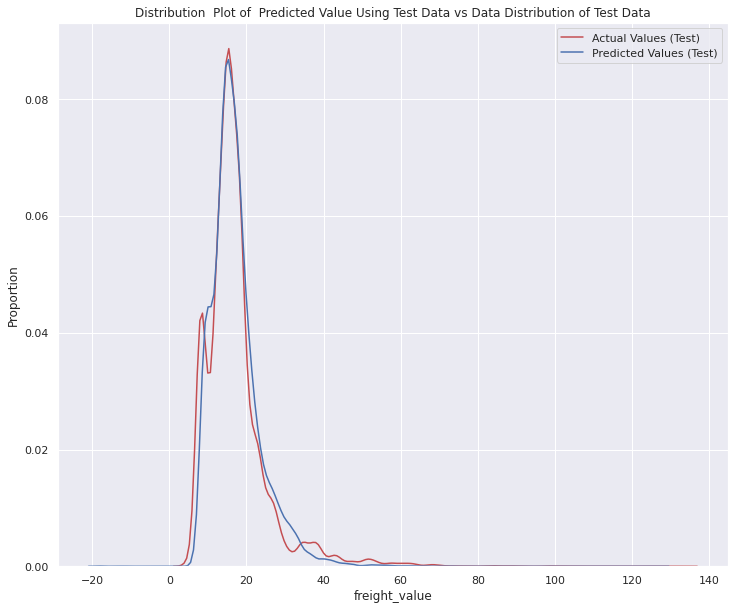

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test2, test_y_2,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
polinomial_df2 = hip2b_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
polinomial_df2[["freight_value predict"]] = clf2.predict(poly2.fit_transform(X2))
polinomial_df2.to_csv('polinomial2.csv')
polinomial_df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,10.934756
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,9.032848
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,15.251778
3,119.85,806.032500,797.958439,5120.0,1050.0,20.03,20.439551
4,55.00,717.067222,1718.535863,2464.0,350.0,34.19,24.183042
...,...,...,...,...,...,...,...
83977,19.90,587.824722,482.976825,2700.0,200.0,11.85,14.261057
83978,21.90,476.075833,161.287192,2880.0,450.0,12.69,11.454801
83979,12.99,277.828333,285.193155,2400.0,200.0,12.79,11.052544
83980,199.00,513.191667,312.694516,14157.0,3050.0,17.87,19.832272


## Random Forest >= 3500

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)

regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor2.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(random_state=0)

In [ ]:
from scipy.stats.stats import median_absolute_deviation
test_y_1 = regressor2.predict(X_test1)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test1, test_y_1 ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test1, test_y_1))
print("R2-score: %.2f" % r2_score(y_test1, test_y_1 ) )

Erro absoluto médio: 9.83
Soma de quadrados residual (MSE): 305.22
R2-score: 0.67


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


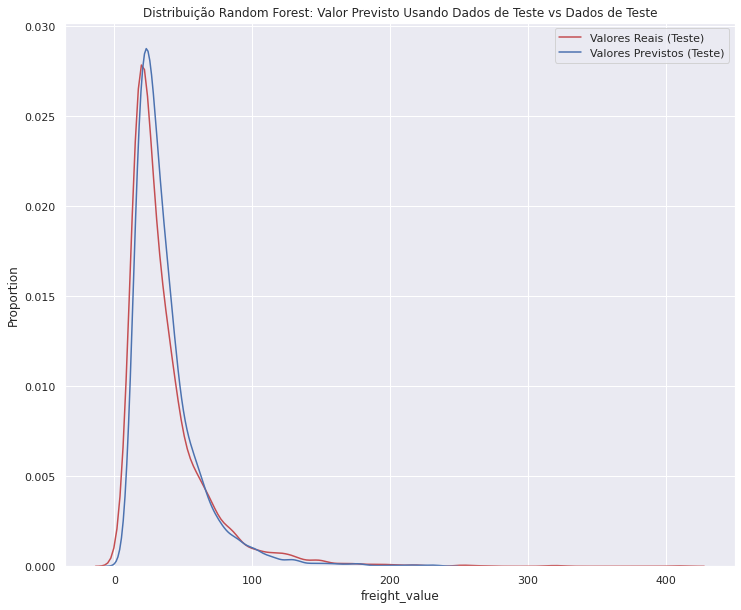

In [ ]:
Title='Distribuição Random Forest: Valor Previsto Usando Dados de Teste vs Dados de Teste'
DistributionPlot(y_test1, test_y_1,"Valores Reais (Teste)","Valores Previstos (Teste)",Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

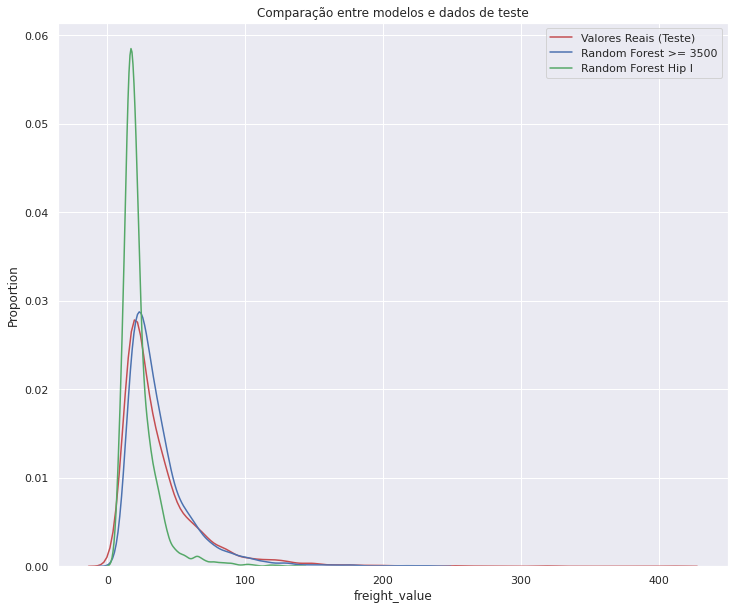

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

random_test_y2 = regressor.predict(X_test1)

ax1 = sns.distplot(y_test1, hist=False, color="r", label='Valores Reais (Teste)')
ax2 = sns.distplot(test_y_1, hist=False, color="b", label= 'Random Forest >= 3500', ax=ax1)
ax3 = sns.distplot(random_test_y2, hist=False, color="g", label= 'Random Forest Hip I', ax=ax1)

    
#ax1 = sns.histplot(RedFunction, color="r", label=RedName)
#ax2 = sns.histplot(BlueFunction, color="b", label=BlueName, ax=ax1)
Title = 'Comparação entre modelos e dados de teste'
plt.title(Title)
plt.xlabel('freight_value')
plt.ylabel('Proportion')
plt.legend()
plt.show()
plt.close()

In [ ]:
#len(y_test)
#len(test_y_)

In [ ]:
#new_df1 = hip2a_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
#new_df1[["freight_value predict"]] = test_y_
#new_df1

#### Validação Cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(regressor2, X1, np.ravel(y1), cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor2, X1, np.ravel(y1), cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor2, X1, np.ravel(y1), cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.6840282258803658 e o desvio padrão é 0.01571554572021871
A média MAE dos folds é 9.636280877162292 e o desvio padrão é 0.25765024977969664
A média MSE dos folds é 289.02217357972944 e o desvio padrão é 14.500158696191749


## Random Forest < 3500

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor2.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(random_state=0)

In [ ]:
test_y_2 = regressor2.predict(X_test2)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test2, test_y_2 ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test2, test_y_2 ))
print("R2-score: %.2f" % r2_score(y_test2, test_y_2 ) )
print(mean_absolute_percentage_error(y_test2, test_y_2))

Erro absoluto médio: 2.82
Soma de quadrados residual (MSE): 28.89
R2-score: 0.59
0.1506010267602532


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


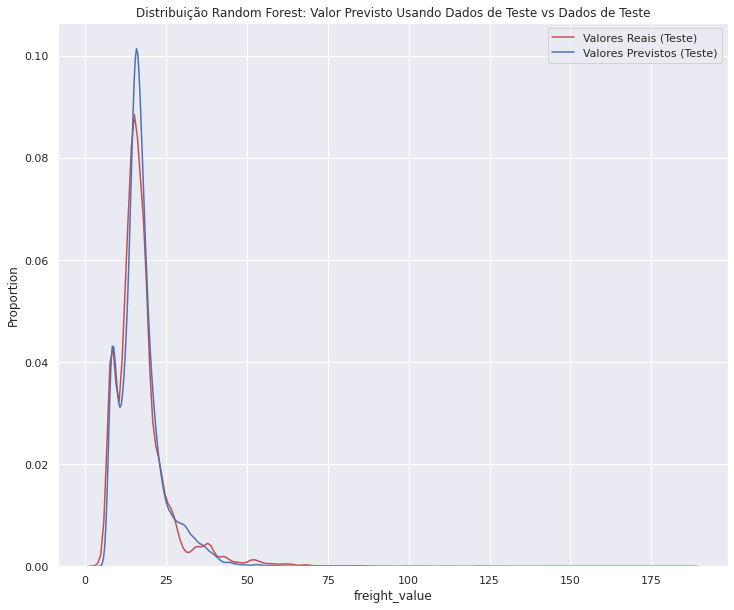

In [ ]:
Title='Distribuição Random Forest: Valor Previsto Usando Dados de Teste vs Dados de Teste'
DistributionPlot(y_test2, test_y_2,"Valores Reais (Teste)","Valores Previstos (Teste)",Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

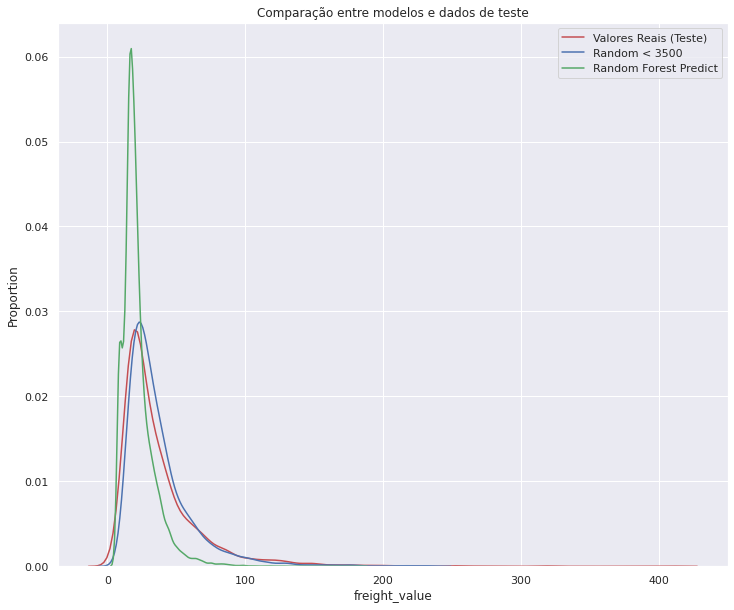

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

random_test_y2 = regressor.predict(X_test2)

ax1 = sns.distplot(y_test1, hist=False, color="r", label='Valores Reais (Teste)')
ax2 = sns.distplot(test_y_1, hist=False, color="b", label= 'Random Forest < 3500', ax=ax1)
ax3 = sns.distplot(random_test_y2, hist=False, color="g", label= 'Random Forest Hip I', ax=ax1)

    
#ax1 = sns.histplot(RedFunction, color="r", label=RedName)
#ax2 = sns.histplot(BlueFunction, color="b", label=BlueName, ax=ax1)
Title = 'Comparação entre modelos e dados de teste'
plt.title(Title)
plt.xlabel('freight_value')
plt.ylabel('Proportion')
plt.legend()
plt.show()
plt.close()

In [ ]:
print(regressor2.predict(X2))

[11.7098  8.5887 18.8119 ... 12.8618 19.5291 14.3564]


#### Validação cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(regressor2, X2, np.ravel(y2), cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor2, X2, np.ravel(y2), cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor2, X2, np.ravel(y2), cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.5802734749550273 e o desvio padrão é 0.015372816740851192
A média MAE dos folds é 2.8538000197919753 e o desvio padrão é 0.027806718223615422
A média MSE dos folds é 30.771114910853214 e o desvio padrão é 1.1881085919998922


## KNN Regressor >= 3500

In [ ]:
neigh1 = KNeighborsRegressor()
neigh1.fit(X_train1, y_train1)
neigh_test_y_1 = neigh1.predict(X_test1)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test1, neigh_test_y_1 ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test1, neigh_test_y_1 ))
print("R2-score: %.2f" % r2_score(y_test1, neigh_test_y_1 ) )

Erro absoluto médio: 11.99
Soma de quadrados residual (MSE): 421.32
R2-score: 0.58


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


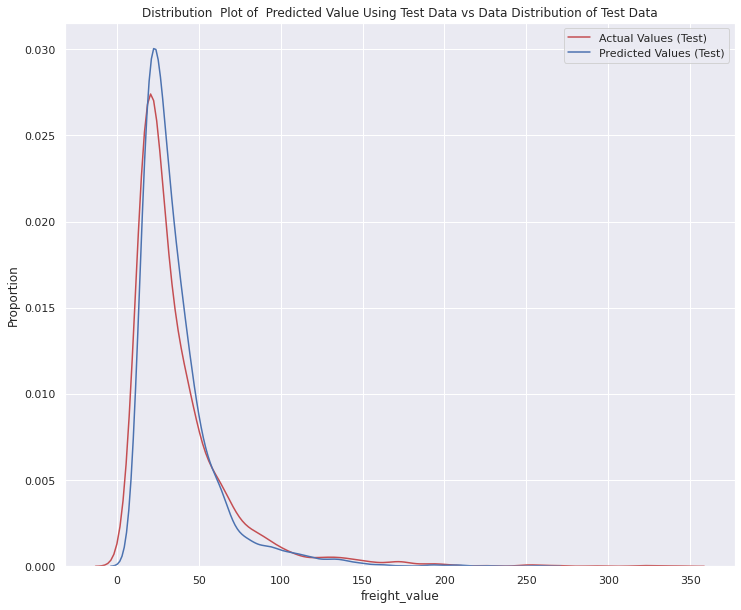

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test1, neigh_test_y_1,"Actual Values (Test)","Predicted Values (Test)",Title)

### Validação cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(neigh1, X1, y1, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh1, X1, y1, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh1, X1, y1, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.5641867102741356 e o desvio padrão é 0.01959566440693238
A média MAE dos folds é 11.607487882115644 e o desvio padrão é 0.49344285055231685
A média MSE dos folds é 394.0960255904163 e o desvio padrão é 53.08086049237988


In [ ]:
knn_df1 = hip2a_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
knn_df1[["freight_value predict"]] = neigh1.predict(X1)
knn_df1.to_csv('knn1.csv')
knn_df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,350.00,355.470000,353.165139,44460.0,8950.0,36.53,23.550
1,299.99,547.816389,2742.331873,53400.0,10150.0,43.41,80.434
2,92.00,337.062500,26.963269,96000.0,16050.0,31.60,33.762
3,129.90,517.068056,147.161653,8000.0,4550.0,18.80,23.984
4,94.00,685.759167,341.615404,57200.0,16550.0,21.50,24.046
...,...,...,...,...,...,...,...
15518,219.90,575.413333,685.470930,44100.0,9800.0,16.98,30.666
15519,119.99,828.830278,256.688692,56430.0,9375.0,44.40,26.290
15520,810.00,463.403333,547.896198,118125.0,13805.0,70.75,60.148
15521,199.90,969.829722,647.764937,42000.0,3750.0,18.14,20.824


## KNN Regressor < 3500

In [ ]:
neigh2 = KNeighborsRegressor()
neigh2.fit(X_train2, y_train2)
neigh_test_y_2 = neigh2.predict(X_test2)

print("Erro absoluto médio: %.2f" % np.mean(np.absolute(neigh_test_y_2 - y_test2)))
print("Soma de quadrados residual (MSE): %.2f" % np.mean((neigh_test_y_2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(y_test2, neigh_test_y_2 ) )

Erro absoluto médio: 3.22
Soma de quadrados residual (MSE): 35.41
R2-score: 0.50


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


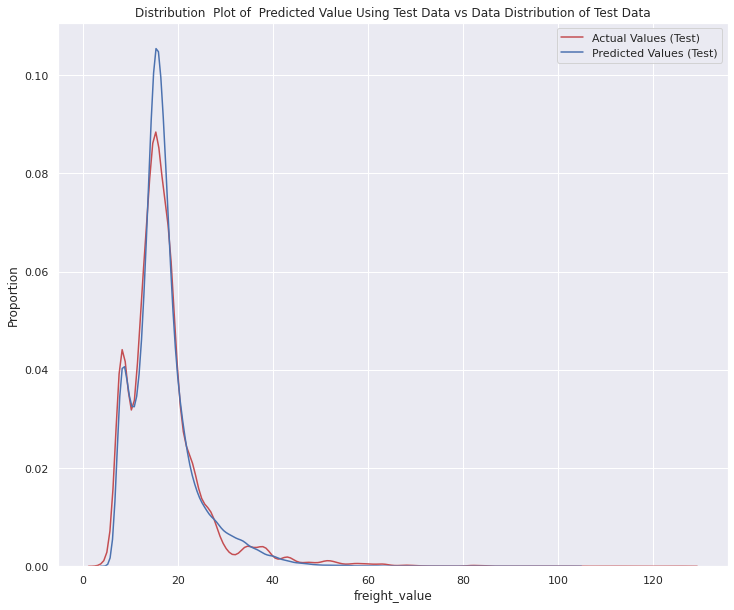

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test2, neigh_test_y_2,"Actual Values (Test)","Predicted Values (Test)",Title)

### Validação Cruzada

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(neigh2, X2, y2, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh2, X2, y2, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh2, X2, y2, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.5018311793234753 e o desvio padrão é 0.009504225437373443
A média MAE dos folds é 3.235642951006672 e o desvio padrão é 0.027705603937553114
A média MSE dos folds é 36.51958200729689 e o desvio padrão é 1.3116931722669323


In [ ]:
knn_df2 = hip2b_df[[ 'price', 'tempo_horas','distance','product_volume_cm3', 'product_weight_g', 'freight_value' ]]
knn_df2[["freight_value predict"]] = neigh2.predict(X2)
knn_df2.to_csv('knn2.csv')
knn_df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,price,tempo_horas,distance,product_volume_cm3,product_weight_g,freight_value,freight_value predict
0,43.00,438.829722,134.665951,1710.0,600.0,12.79,13.048
1,55.99,239.924444,71.690647,8000.0,100.0,8.72,8.710
2,99.90,390.759722,338.223211,9576.0,967.0,16.95,16.876
3,119.85,806.032500,797.958439,5120.0,1050.0,20.03,20.808
4,55.00,717.067222,1718.535863,2464.0,350.0,34.19,24.854
...,...,...,...,...,...,...,...
83977,19.90,587.824722,482.976825,2700.0,200.0,11.85,15.784
83978,21.90,476.075833,161.287192,2880.0,450.0,12.69,13.440
83979,12.99,277.828333,285.193155,2400.0,200.0,12.79,11.804
83980,199.00,513.191667,312.694516,14157.0,3050.0,17.87,20.528


### Conclusão - Hipótese II

O modelo com melhor desempenho contínua sendo o Random Forest entre os 3 modelos testados. \
Para os modelos treinados com base no conjunto de dados que possui valores de peso maiores que 3,5kg, os erros aumentam muito em comparação com os modelos treinados com todo o dataset. \
Para os modelos treinados com base no conjunto de dados que possui valores de peso menores que 3,5kg, os erros diminuem em comparação com os modelos treinados com todo o dataset.\
Isso mostra que para pesos maiores, há bastante viés nos dados e valores de frete, porém para os pesos menores, que são a maioria, o treinamento ocorre bem.

# **V) Hipótese III**

Utilizando dummies categoricos de 2 remodelagens de categoria feitas

### **Hipótese III-a**

4 - Categorias

Polinomial

Random Forest

KNN Regressor

#### Polinomial

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(C1_X, C1_y, test_size=0.3)

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(X_train)

clf = linear_model.LinearRegression()
clf.fit(train_x_poly, y_train)

test_x_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(test_x_poly)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, test_y_ ) )


Erro absoluto médio: 4.43
Soma de quadrados residual (MSE): 82.81
R2-score: 0.66


**Cross Validation**

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
x_poly = poly.fit_transform(C1_X)

Rcross = cross_val_score(clf, x_poly, C1_y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly, C1_y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly, C1_y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.649264550364372 e o desvio padrão é 0.03244876988909941
A média MAE dos folds é 4.443796959527288 e o desvio padrão é 0.02182724299585026
A média MSE dos folds é 82.65675045341477 e o desvio padrão é 6.708469728763213


#### **Random Forest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(C1_X, C1_y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, np.ravel(y_train))
random_test_y_ = regressor.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, random_test_y_))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, random_test_y_))
print("R2-score: %.2f" % r2_score(y_test, random_test_y_ ) )

Erro absoluto médio: 3.44
Soma de quadrados residual (MSE): 60.48
R2-score: 0.76


**Validação Cruzada**

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(regressor, C1_X, np.ravel(C1_y), cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor, C1_X, np.ravel(C1_y), cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor, C1_X, np.ravel(C1_y), cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.7499206529651066 e o desvio padrão é 0.009185733612762882
A média MAE dos folds é 3.4500818427382205 e o desvio padrão é 0.024395310159788002
A média MSE dos folds é 63.37347707276458 e o desvio padrão é 2.064776309007136


#### KNN Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(C1_X, C1_y, test_size=0.2)

neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
neigh_test_y_ = neigh.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, neigh_test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, neigh_test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, neigh_test_y_ ) )


Erro absoluto médio: 4.05
Soma de quadrados residual (MSE): 93.99
R2-score: 0.65


In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(neigh, C1_X, C1_y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh, C1_X, C1_y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh, C1_X, C1_y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.668548837627361 e o desvio padrão é 0.016357008645705943
A média MAE dos folds é 4.021620943671172 e o desvio padrão é 0.05135237051545703
A média MSE dos folds é 84.26520068016683 e o desvio padrão é 1.3868729142263019


### **Hipótese III-b**

14 - Categorias

Polinomial

Random Forest

KNN Regressor

#### **Polinomial**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(C2_X, C2_y, test_size=0.3)

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(X_train)

clf = linear_model.LinearRegression()
clf.fit(train_x_poly, y_train)

test_x_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(test_x_poly)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, test_y_ ) )


Erro absoluto médio: 4.39
Soma de quadrados residual (MSE): 82.33
R2-score: 0.65


**Cross Validation** K-Fold

In [ ]:
poly = PolynomialFeatures(degree=3)
kf = KFold(n_splits=5, shuffle=True)
x_poly = poly.fit_transform(C2_X)

Rcross = cross_val_score(clf, x_poly, C2_y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly, C2_y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(clf, x_poly, C2_y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.6664939618178917 e o desvio padrão é 0.01198280191539652
A média MAE dos folds é 4.4321259073536154 e o desvio padrão é 0.07971508667893894
A média MSE dos folds é 87.26510553076314 e o desvio padrão é 5.606219352577292


#### **Random Forest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(C2_X, C2_y, test_size=0.3)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, np.ravel(y_train))
random_test_y_ = regressor.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, random_test_y_))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, random_test_y_))
print("R2-score: %.2f" % r2_score(y_test, random_test_y_ ) )

Erro absoluto médio: 3.39
Soma de quadrados residual (MSE): 57.24
R2-score: 0.76


**Cross Validation** K-Fold

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(regressor, C2_X, np.ravel(C2_y), cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor, C2_X, np.ravel(C2_y), cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(regressor, C2_X, np.ravel(C2_y), cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.7525067497165817 e o desvio padrão é 0.0032143117571670275
A média MAE dos folds é 3.4627579017760937 e o desvio padrão é 0.04453888686939217
A média MSE dos folds é 63.10889368694895 e o desvio padrão é 6.031848811036443


#### **KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(C2_X, C2_y, test_size=0.3)

neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
neigh_test_y_ = neigh.predict(X_test)

print("Erro absoluto médio: %.2f" % mean_absolute_error(y_test, neigh_test_y_ ))
print("Soma de quadrados residual (MSE): %.2f" % mean_squared_error(y_test, neigh_test_y_ ))
print("R2-score: %.2f" % r2_score(y_test, neigh_test_y_ ) )


Erro absoluto médio: 3.99
Soma de quadrados residual (MSE): 80.30
R2-score: 0.66


In [ ]:
kf = KFold(n_splits=5, shuffle=True)

Rcross = cross_val_score(neigh, C2_X, C2_y, cv=kf)
Rcross
print("A média R2 dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh, C2_X, C2_y, cv=kf, scoring = 'neg_mean_absolute_error')
Rcross
print("A média MAE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

Rcross = -1 * cross_val_score(neigh, C2_X, C2_y, cv=kf, scoring = 'neg_mean_squared_error')
Rcross
print("A média MSE dos folds é", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média R2 dos folds é 0.6625372710305666 e o desvio padrão é 0.008891386317047728
A média MAE dos folds é 4.047521853173207 e o desvio padrão é 0.04923456498264574
A média MSE dos folds é 85.49990178861364 e o desvio padrão é 4.385310719977946


### Conclusão - Hipótese III

A Hipótese III teve um resultado geral melhor do que a Hipótese I.\
Entre as hipóteses III-a e III-b, a que apresentou melhores resultados foi a III-b.